# Análise dos profissionais na área de dados

Este projeto foi desenvolvido com o intuito de entender quem são os profissionais da área de dados no mercado brasileiro, qual o perfil destes profissionais, faixa etária, representatividade de grupos minoritários, faixa salarial, dentre outros. Para tanto, utilizei o dataset  resultante da pesquisa desenvolvida pelo Data Hackers e Bain & Company,  o qual compila diversos dados como, por exemplo, dados demográficos, sobre carreira, conhecimentos em áreas específicas. O referido dataset pode ser aqui acessado: https://www.kaggle.com/datasets/datahackers/state-of-data-2022

TODO Vc precisa fazer uma introdução (título, explicação, motivação, etc...) #satisfiz?

## Importação das bibliotecas

In [2]:
# TODO remover imports que nao sao utilizados #DONE
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import geopandas as gpd
#import geobr
import squarify


## Importação dos dados

O dataset utilizado para elaboração deste projeto foi extraído do Kaggle, o qual aborda um panorama acerca do mercado de trabalho brasileiro na área de dados como, por exemplo: idade, gênero, distribuição geográfica, cargo, faixa salarial, entre outros.

In [190]:
# TODO Coloque o link do dataset para que outras pessoas possam acessalo de maneira fácil (colocar no bloco de markdown)
# COLOQUEI NA INTRODUÇÃO. ACHA OPORTUNO OU COLOCO APENAS AQUI?
dados = pd.read_csv('State_of_data_2022.csv')


In [4]:
dados.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analisando, rapidamente, o nome das colunas através de lista para uma melhor visualização

In [191]:
list(dados)


["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_g ', 'vive_no_brasil')",
 "('P1_i ', 'Estado onde mora')",
 "('P1_i_1 ', 'uf onde mora')",
 "('P1_i_2 ', 'Regiao onde mora')",
 "('P1_j ', 'Mudou de Estado?')",
 "('P1_k ', 'Regiao de origem')",
 "('P1_l ', 'Nivel de Ensino')",
 "('P1_m ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você 

## Limpeza dos dados

### Renomeando colunas

O dataset possui 353 colunas, divididos em oito partes, apresentando, por exemplo, a seguinte estrutura: "('P1_a_1 ', 'Faixa idade')", onde P1 = Parte 1, pergunta (a), opção (1).
Dessa forma, entendi que essa estrutura dificultaria um pouco as análises e decidi renomear todas as colunas apenas mantendo a parte da pergunta em si, na qual o exemplo acima seria tão somente 'Faixa idade'.

In [6]:
# o ideal é que a funcao lide com todos os problemas e que nada seja feito "na munheca". Essa suA funcao serve para 98% dos casos, ajuste ela para funcionar para 100%
# sugestao: if quantidade de apostofo for menor que 5 faca exatamenteo que a funcao faz, caso seja maior ou igual a 5, adote uma outra abordagem
# sugestao2: faca primeiramente uma funcao que seja capaz de lidar com os exemplos no qual essa funcao falha

def process_column_name(column_name):
    new_name = eval(column_name)[-1]
    return new_name

process_column_name("('P2_h ', 'Faixa salarial')")


'Faixa salarial'

TESTE TESTE TESTE

In [204]:
lista_teste = ["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')",
 "('P1_d ', 'PCD')",
 "('P6_h_2 ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')"]

apostrofo="'"

for i in lista_teste:
    if i.count(apostrofo) >=5:
        i.strip("'")
        print(i)
    


('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')
('P6_h_2 ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')


Função desenvolvida, realizei um teste através de uma lista com o nomes das colunas para depois implementar em todo o dataset (NAO PRECISA DEIXAR ESSES MEUS TESTES NO CODIGO, APENAS PARA CONTROLE QUANDO DA ELABORAÇÃO)

In [7]:
lista_colunas_teste = ["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_g ', 'vive_no_brasil')",
 "('P1_i ', 'Estado onde mora')",
 "('P1_i_1 ', 'uf onde mora')",
 "('P1_i_2 ', 'Regiao onde mora')",
 "('P1_j ', 'Mudou de Estado?')",
 "('P1_k ', 'Regiao de origem')",
 "('P1_l ', 'Nivel de Ensino')",
 "('P1_m ', 'Área de Formação')"]

for i in lista_colunas_teste:
    print(process_column_name(i))
    

id
Idade
Faixa idade
Genero
Cor/raca/etnia
PCD
experiencia_profissional_prejudicada
aspectos_prejudicados
vive_no_brasil
Estado onde mora
uf onde mora
Regiao onde mora
Mudou de Estado?
Regiao de origem
Nivel de Ensino
Área de Formação


Após o teste acima, verifiquei que algumas colunas não foram devidamente renomeadas, uma vez que elas possuíam cinco apóstrofos (o mesmo de aspas simples), em vez de quatro como todas as outras que foram renomeadas. 
Por exemplo: ('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')

In [8]:
lista_colunas = list(dados)

for i in lista_colunas:
    if i.count("'") >=5:
        print(i)

('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')
('P6_h_2 ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')
('P7_a_4 ', 'Utilizo API's para extrair dados e complementar minhas análises.')
('P7_a_6 ', 'Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')
('P7_d_4 ', 'Utilizando API's para extrair dados e complementar minhas análises.')
('P7_d_6 ', 'Desenvolvendo/cuidando da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')
('P8_b_7 ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')


Assim, para remover o apóstrofo optei por utilizar a função rename do pandas já que eram apenas sete colunas a serem renomeadas.

In [9]:
dados.rename(columns={"('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')" : "('P6_a_2 ', 'Realizo construções de ETLs em ferramentas como Pentaho, Talend, Dataflow etc.')",
                      "('P6_h_2 ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')": "('P6_h_2 ', 'Realizando construções de ETLs em ferramentas como Pentaho, Talend, Dataflow etc.')",
                      "('P7_a_4 ', 'Utilizo API's para extrair dados e complementar minhas análises.')": "('P7_a_4 ', 'Utilizo APIs para extrair dados e complementar minhas análises.')",
                      "('P7_a_6 ', 'Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')": "('P7_a_6 ', 'Desenvolvo/cuido da manutenção de ETLs utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
                      "('P7_d_4 ', 'Utilizando API's para extrair dados e complementar minhas análises.')": " ('P7_d_4 ', 'Utilizando APIs para extrair dados e complementar minhas análises.')",
                      "('P7_d_6 ', 'Desenvolvendo/cuidando da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')": "('P7_d_6 ', 'Desenvolvendo/cuidando da manutenção de ETLs utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
                      "('P8_b_7 ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')": " ('P8_b_7 ', 'Utilizo cadeias de Markov ou HMMs para realizar análises de dados')"
                      }, inplace=True)



Realizando um teste para ter certeza que o problema foi adequadamente resolvido.
Nao é necessario tanto detalhe, pequenos testes devem ser apenas para voce. Coloque apenas a funcao e aplique ela, mas explique o porque que a funcao precisa lidar com casos especificos

In [10]:
lista_colunas = list(dados)

for i in lista_colunas:
    if i.count("'") >=5:
        print(i)

In [11]:
for i in lista_colunas:
    print(process_column_name(i))

id
Idade
Faixa idade
Genero
Cor/raca/etnia
PCD
experiencia_profissional_prejudicada
aspectos_prejudicados
vive_no_brasil
Estado onde mora
uf onde mora
Regiao onde mora
Mudou de Estado?
Regiao de origem
Nivel de Ensino
Área de Formação
Qual sua situação atual de trabalho?
Setor
Numero de Funcionarios
Gestor?
Cargo como Gestor
Cargo Atual
Nivel
Faixa salarial
Quanto tempo de experiência na área de dados você tem?
Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?
Você está satisfeito na sua empresa atual?
Qual o principal motivo da sua insatisfação com a empresa atual?
Falta de oportunidade de crescimento no emprego atual
Salário atual não corresponde ao mercado
Não tenho uma boa relação com meu líder/gestor
Gostaria de trabalhar em em outra área de atuação
Gostaria de receber mais benefícios
O clima de trabalho/ambiente não é bom
Falta de maturidade analítica na empresa
Você participou de entrevistas de emprego nos ú

In [12]:
for i in lista_colunas:
    dados.rename(columns={i: process_column_name(i)}, inplace=True)
dados

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verificando dados duplicados e ausentes 

Verifiquei também a existência de valores nulos

E ai? Se tu nao vai fazer nada precisa explicar o pq de nao fazer nada. Se for fazer algo, explique a motivacao de fazer algo, trazer a informacao de maneira solta, mas sem uma acao nao contribui em nada
E as outras colunas que nao aparecem abaixo, elas nao sao importantes?

In [13]:
dados.isnull().sum()

id                                                                                                               0
Idade                                                                                                           74
Faixa idade                                                                                                      0
Genero                                                                                                           9
Cor/raca/etnia                                                                                                   0
                                                                                                              ... 
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.           3642
Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.            3642
Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.    

## Análise exploratória

### Visão geral dos dados

In [14]:
dados.head()

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


na limpeza de dados talvez valha a pena transformas as variaveis categoricas que podem ser numericas em variaveis categoricas (nao necessariamente, vale estudar se faz sentido em maisd eum caso)

eu acho que esse bloco abaixo ele tem o potencial de trazer muitras informacoes uteis, mas nao ta sendo bem aproveitado, nao esta sendo explicado de maneira alguma e ta sendo deixado para o usuario interpretar sozinho e provavelmente ter uma interpretacao erronea

por exemplo, o count de falta de oportunidade esta em 960, pq isso ta rolando? ta bem confuso pra mim... tem tatno null assim?
acho que aqui tem um potencial muito grande de informacoes a serem exploradas, mas precisa de pelo menos um pouco de ajuda para quem vai ler

In [15]:
dados.describe()

,Idade,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
count,4197.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,3694.000000,3694.000000,...,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,31.169168,0.436458,0.389583,0.066667,0.321875,0.184375,0.142708,0.383333,0.750677,0.192745,...,0.478537,0.248013,0.324324,0.095390,0.057234,0.065183,0.006359,0.031797,0.019078,0.015898
std,6.902803,0.496205,0.487910,0.249574,0.467439,0.387992,0.349957,0.486452,0.432680,0.394508,...,0.499937,0.432203,0.468494,0.293986,0.232473,0.247045,0.079555,0.175598,0.136908,0.125182
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
dados.shape

(4271, 353)

Conforme código acima, verifica-se um total de 4271 linhas, o que corresponde ao total de pessoas que responderam a pesquisa.

### Dados demográficos (idade, gênero, cor, localização geográfica, área de formação)

#### Idade

In [17]:
dados['Faixa idade'].value_counts(dropna=False)

25-29    1398
30-34    1095
35-39     598
22-24     449
40-44     277
17-21     152
45-49     145
50-54      89
55+        68
Name: Faixa idade, dtype: int64

In [18]:
# percentualmente:

(dados['Faixa idade'].value_counts(dropna=False, normalize=True)*100).round(2)

25-29    32.73
30-34    25.64
35-39    14.00
22-24    10.51
40-44     6.49
17-21     3.56
45-49     3.39
50-54     2.08
55+       1.59
Name: Faixa idade, dtype: float64

Conforme percentual acima, verifiquei que mais de 58% dos profissionais entrevistados encontram-se na faixa etária de 25 a 34 anos, ou seja, um público predominantemente jovem.

Para visualizar essa distribuição de forma gráfica, plotei um histograma uma vez que essse gráfico é o mais adequado quando se trata de distribuição de frequências. 

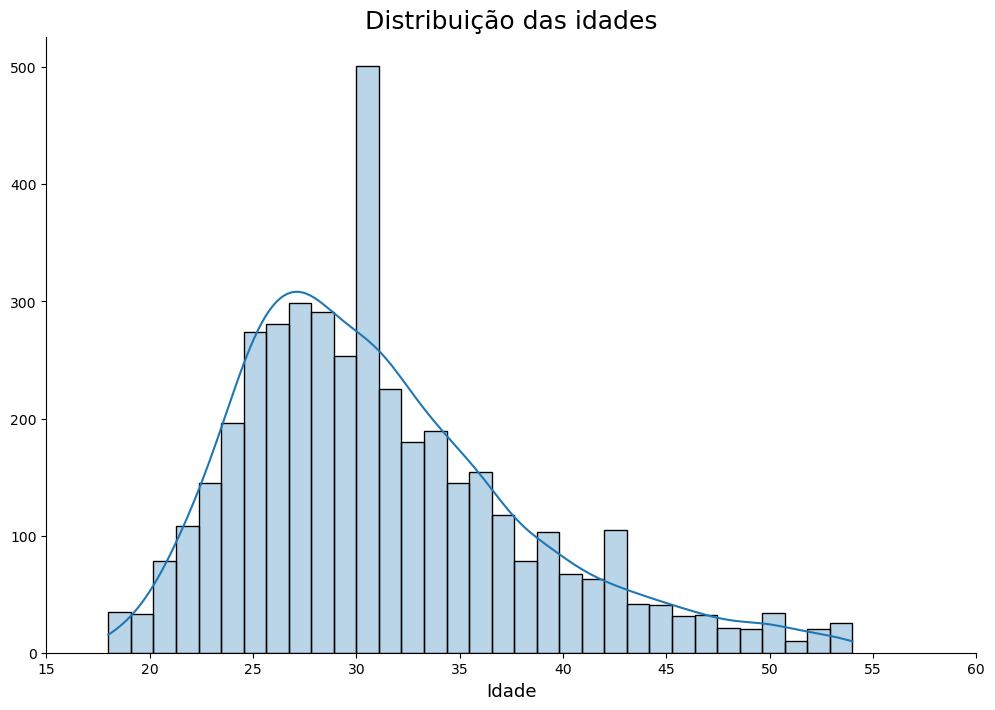

In [19]:
idade_hist = sns.histplot(data=dados, x='Idade', kde=True, palette='Blues_r', alpha=0.3)
idade_hist.set_xlabel('Idade', fontsize=13)
idade_hist.set_ylabel('')
idade_hist.set_title('Distribuição das idades', fontsize=18)
idade_hist.set(xticks = np.arange(15, 61, 5)) # Fazer com os valores no eixo x vão de 15 a 60, de 5 em 5, uma vez que a idade mínima é 18 e a máxima 54.
idade_hist.figure.set_size_inches(12,8)
idade_hist.spines['top'].set_visible(False)
idade_hist.spines['right'].set_visible(False)
plt.show(idade_hist)

#### Gênero

Em seguida, analisando a quantidade de pessoas por gênero (masculino e feminino), bem como as pessoas que optaram por não informar.

In [20]:
# Quantidade de pessoas por genero

dados['Genero'].value_counts( dropna=False)


Masculino               3194
Feminino                1056
Prefiro não informar      12
NaN                        9
Name: Genero, dtype: int64

In [21]:
# percentualmente

(dados['Genero'].value_counts(dropna=False, normalize=True)*100).round(2)

Masculino               74.78
Feminino                24.72
Prefiro não informar     0.28
NaN                      0.21
Name: Genero, dtype: float64

In [22]:
# Definindo função para traçar porcentagens nos gráficos de barras que não possuem o hue

# Para barras verticais

def without_hue_v(ax, df):
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

# para barras horizontais

def without_hue_h(ax, df):
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2 - 0.05
        ax.annotate(percentage, (x, y))

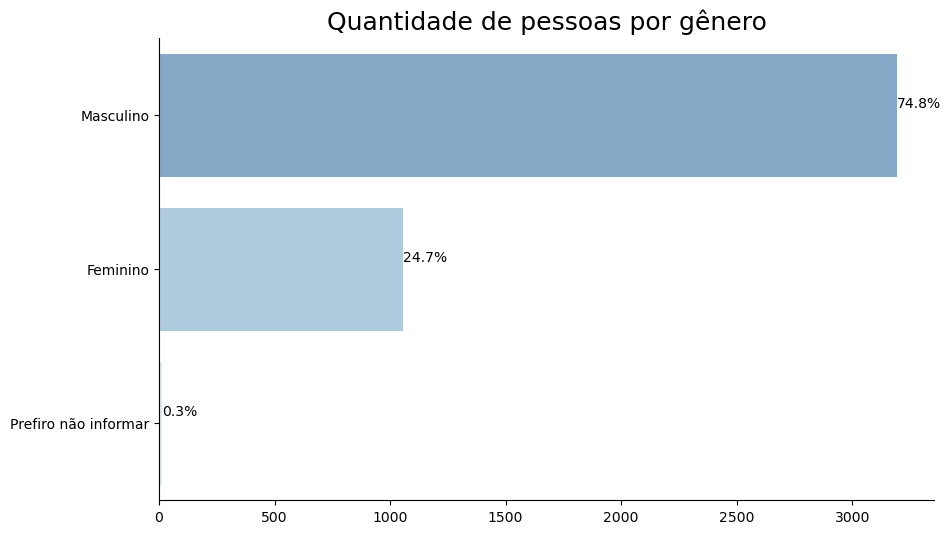

In [23]:
# Gráfico de barrras para verificação do percentual de pessoas por genero

genero_chart = sns.countplot(y=dados['Genero'], palette='Blues_r', alpha=0.6)
genero_chart.set_xlabel('', fontsize=13)
genero_chart.set_ylabel('', fontsize=14)
genero_chart.set_title('Quantidade de pessoas por gênero', fontsize=18)
genero_chart.figure.set_size_inches(10,6)
genero_chart.spines['top'].set_visible(False)
genero_chart.spines['right'].set_visible(False)
          
without_hue_h(genero_chart, dados['Genero'])     

Em que pese todas as iniciativas para inclusão de mulheres no ramo da tecnologia, percebe-se que ainda asim percentual entre homens e mulheres profissionais de dados é discrepante, quase 75% dos profissionais entrevistados são do gênero masculino. 

No questionário que resultou neste dataset, havia tão somente as três opções de gênero: feminino, masculino e prefiro não informar. Apenas 0,3% das pessoas entrevistadas optaram pela última. Me indaguei o seguinte: se houvesse outras opções de resposta como, por exemplo, não binário, se essas pessoas responderiam manteriam o 'prefiro não informar'? É importante incluir outras identidades de gênero? 

#### Cor/raça/etnia

Dando continuidade, verificando a quantidade de pessoas por cor/raça/etnia

In [24]:
dados['Cor/raca/etnia'].value_counts(dropna=False)

Branca                  2744
Parda                   1054
Preta                    291
Amarela                  128
Prefiro não informar      26
Outra                     17
Indígena                  11
Name: Cor/raca/etnia, dtype: int64

In [25]:
# percentualmente

(dados['Cor/raca/etnia'].value_counts(dropna=False, normalize=True)*100).round(2)

Branca                  64.25
Parda                   24.68
Preta                    6.81
Amarela                  3.00
Prefiro não informar     0.61
Outra                    0.40
Indígena                 0.26
Name: Cor/raca/etnia, dtype: float64

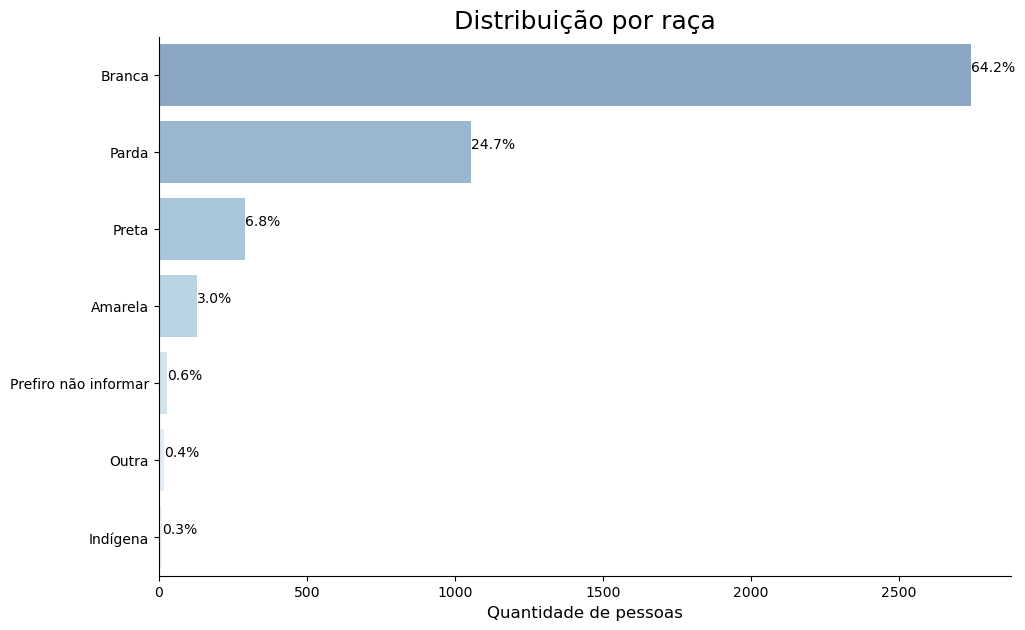

In [26]:
# Plotando gráfico de barras para melhor visualizar

raca_chart = sns.countplot(y=dados['Cor/raca/etnia'], palette='Blues_r', alpha=0.5, order=dados['Cor/raca/etnia'].value_counts().index)
raca_chart.set_xlabel('Quantidade de pessoas', fontsize=12)
raca_chart.set_ylabel('', fontsize=14)
raca_chart.set_title('Distribuição por raça', fontsize=18)
raca_chart.figure.set_size_inches(11,7)
raca_chart.spines['top'].set_visible(False)
raca_chart.spines['right'].set_visible(False)

without_hue_h(raca_chart, dados['Cor/raca/etnia'])                  
                  

Em que pese as várias políticas afirmativas para inclusão e diversidade de grupo minoritários no mercado tecnologia, o gráfico acima mostra que o setor de TI ainda é ocupado majoritariamente por pessoas brancas. 

#### Localização geográfica

In [27]:
# Localização geográfica dos profissionais

dados['uf onde mora'].value_counts(dropna=False)

SP     1745
MG      478
RJ      338
PR      309
RS      204
BA      162
SC      156
DF      132
PE      120
NaN     115
CE       95
ES       81
GO       55
PB       42
RN       38
PA       35
AL       32
SE       28
MA       28
AM       26
MT       19
PI       17
MS       16
Name: uf onde mora, dtype: int64

In [28]:
# percentualmente

(dados['uf onde mora'].value_counts(dropna=False, normalize=True)*100).round(2)

SP     40.86
MG     11.19
RJ      7.91
PR      7.23
RS      4.78
BA      3.79
SC      3.65
DF      3.09
PE      2.81
NaN     2.69
CE      2.22
ES      1.90
GO      1.29
PB      0.98
RN      0.89
PA      0.82
AL      0.75
SE      0.66
MA      0.66
AM      0.61
MT      0.44
PI      0.40
MS      0.37
Name: uf onde mora, dtype: float64

In [29]:
names = dados['uf onde mora'].value_counts().index
percent = (dados['uf onde mora'].value_counts(normalize=True).values*100).round(2)
names_with_percent = [names[i]+' \n'+ str(percent[i])+ '%' for i in range(len(names))] 
df_treemap = pd.DataFrame({'percentage':percent,
                        'labels':names_with_percent})
df_treemap


,percentage,labels
0,41.99,SP \n41.99%
1,11.50,MG \n11.5%
2,8.13,RJ \n8.13%
3,7.44,PR \n7.44%
4,4.91,RS \n4.91%
5,3.90,BA \n3.9%
6,3.75,SC \n3.75%
7,3.18,DF \n3.18%
8,2.89,PE \n2.89%
9,2.29,CE \n2.29%


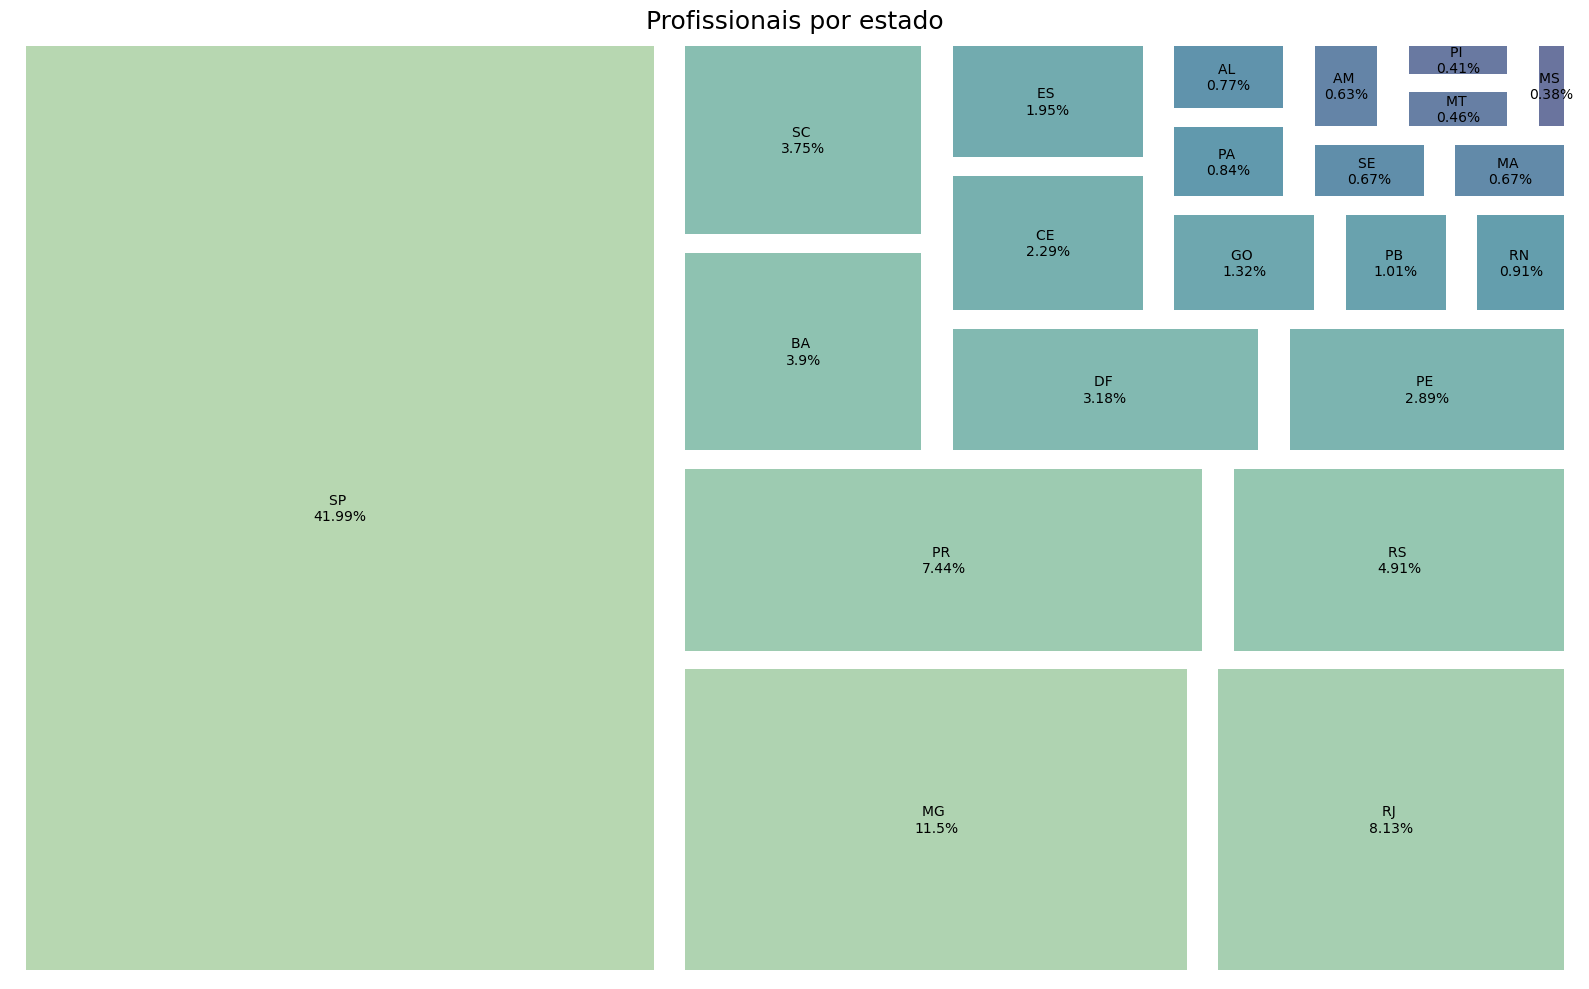

In [30]:
# Plotando um treemap para melhor dos profissionais por estado

plt.figure(figsize=(16, 10))
norms = squarify.normalize_sizes(df_treemap['percentage'].to_list(),  dx=3, dy=3)
uf_plot = squarify.plot(sizes=norms, 
                   label=df_treemap['labels'].to_list(), 
                   alpha=0.7, 
                   pad=True,
                   text_kwargs={'fontsize': 10},
                   color=sns.color_palette('crest', len(dados['uf onde mora'].value_counts())))

uf_plot.axis('off')
plt.title('Profissionais por estado', fontsize=18)
plt.xticks([]) # Retirando xtick labels
plt.yticks([]) # Retirando ytick labels
plt.tight_layout()

 Em que pese o trabalho remoto ser a realidade de muitos profissionais (como veremos em breve), possibilitando o trabalho de qualquer lugar, rapidamente percebe-se que o estado de São Paulo concentra disparadamente a maioria dos profissionais, aproximadamente 42%, seguido pelo estado de Minas Gerais e Rio de Janeiro, 12 e 8%, respectivamente. Vale destacar que
o Censo de 2022 do IBGE apontou que os estados de São Paulo, Minas Gerais e Rio de Janeiro seguem sendo os estados mais populosos do país (Fonte: https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/37237-de-2010-a-2022-populacao-brasileira-cresce-6-5-e-chega-a-203-1-milhoes)

Ainda trazendo dados do Censo de 2022 do IBGE, a população residente no Brasil se distribui desta forma: 41,78 % no Sudeste, 26,91% no Nordeste, 14,74% no Sul, 8,54% no Norte e 8,02% no Centro-Oeste. Assim, entendi que seria interessante  uma visualização por região do Brasil para saber se coincide com a distribuição dos profissionais respondentes da pesquisa que resultou no dataset utilizado. Todavia, não seguem a mesma proporção conforme treemap abaixo.

In [31]:
dados['Regiao onde mora'].value_counts()

Sudeste         2642
Sul              669
Nordeste         562
Centro-oeste     222
Norte             76
Name: Regiao onde mora, dtype: int64

In [32]:
region = dados['Regiao onde mora'].value_counts().index
region_percent = (dados['Regiao onde mora'].value_counts(normalize=True).values*100).round(2)
region_with_percent = [region[i]+' \n'+ str(region_percent[i])+ '%' for i in range(len(region))] 
df_region = pd.DataFrame({'percentage':region_percent,
                        'labels':region_with_percent})
df_region

,percentage,labels
0,63.34,Sudeste \n63.34%
1,16.04,Sul \n16.04%
2,13.47,Nordeste \n13.47%
3,5.32,Centro-oeste \n5.32%
4,1.82,Norte \n1.82%


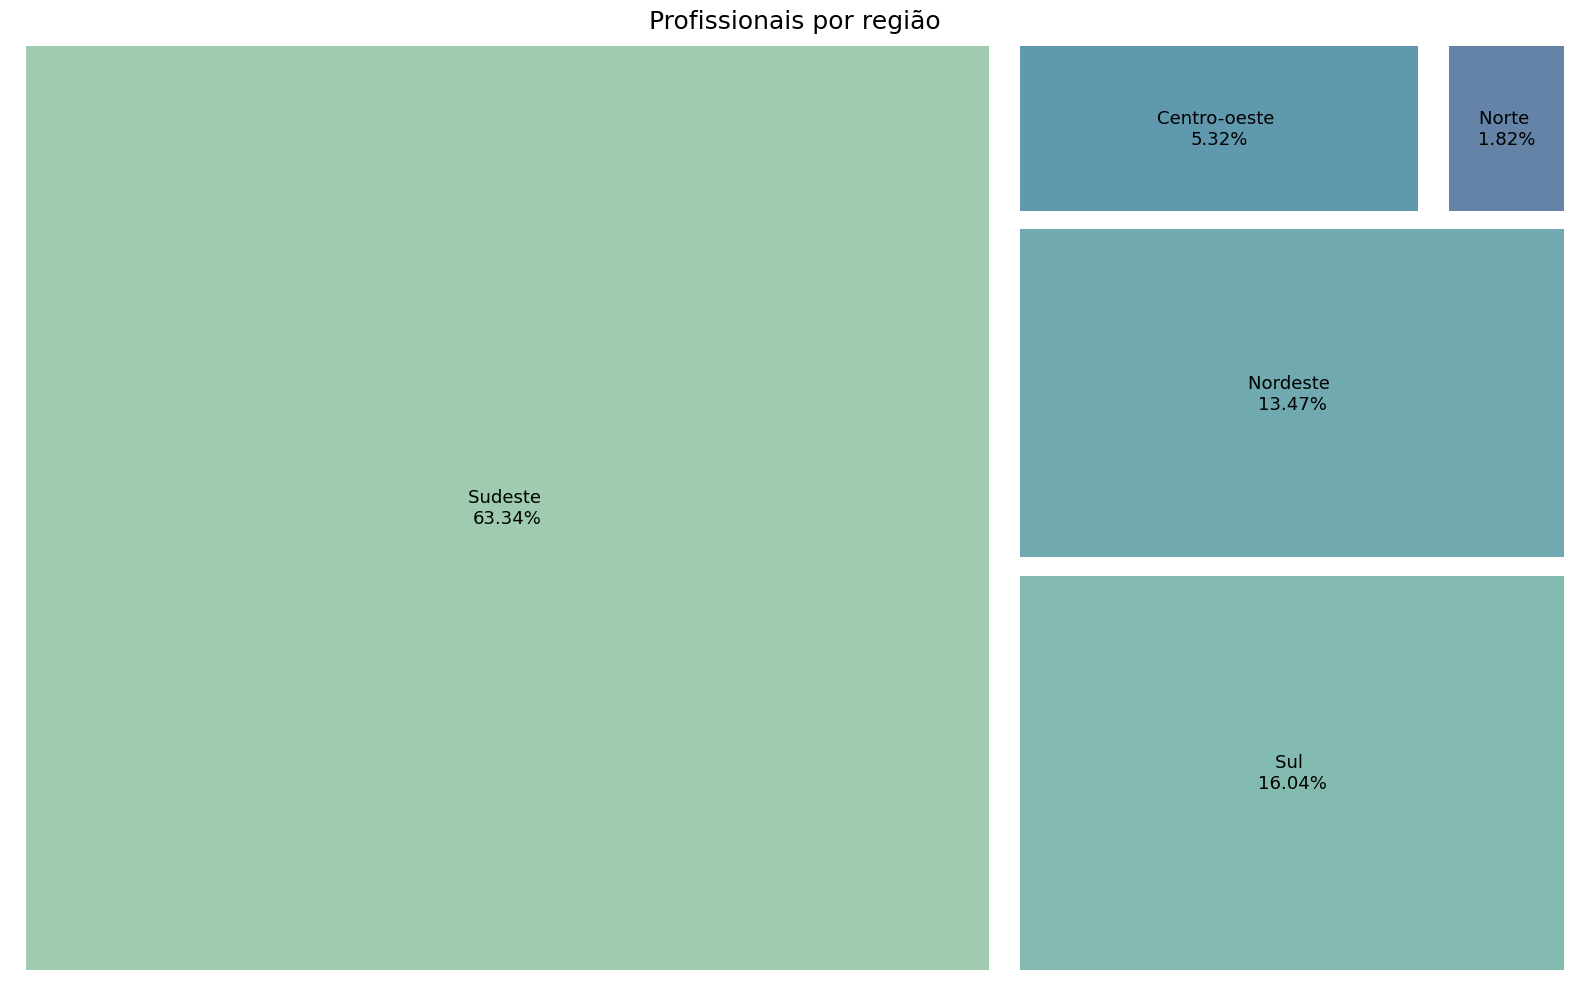

In [33]:
# Plotando um treemap para melhor dos profissionais por região

plt.figure(figsize=(16, 10))
norms = squarify.normalize_sizes(df_region['percentage'].to_list(),  dx=3, dy=3)
region_plot = squarify.plot(sizes=norms, 
                   label=df_region['labels'].to_list(), 
                   alpha=0.7, 
                   pad=True,
                   text_kwargs={'fontsize': 13},
                   color=sns.color_palette('crest', len(dados['Regiao onde mora'].value_counts())))

region_plot.axis('off')
plt.title('Profissionais por região', fontsize=18)
plt.xticks([]) # Retirando xtick labels
plt.yticks([]) # Retirando ytick labels
plt.tight_layout()

#### Área de formação

In [161]:
dados['Área de Formação'].value_counts()

Computação / Engenharia de Software / Sistemas de Informação/ TI          1543
Outras Engenharias                                                         941
Economia/ Administração / Contabilidade / Finanças/ Negócios               641
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     405
Outra opção                                                                200
Marketing / Publicidade / Comunicação / Jornalismo                         122
Química / Física                                                           112
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     111
Ciências Sociais                                                            74
Name: Área de Formação, dtype: int64

In [162]:
# percentualmente 

(dados['Área de Formação'].value_counts(normalize=True)*100).round(2)

Computação / Engenharia de Software / Sistemas de Informação/ TI          37.19
Outras Engenharias                                                        22.68
Economia/ Administração / Contabilidade / Finanças/ Negócios              15.45
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     9.76
Outra opção                                                                4.82
Marketing / Publicidade / Comunicação / Jornalismo                         2.94
Química / Física                                                           2.70
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     2.68
Ciências Sociais                                                           1.78
Name: Área de Formação, dtype: float64

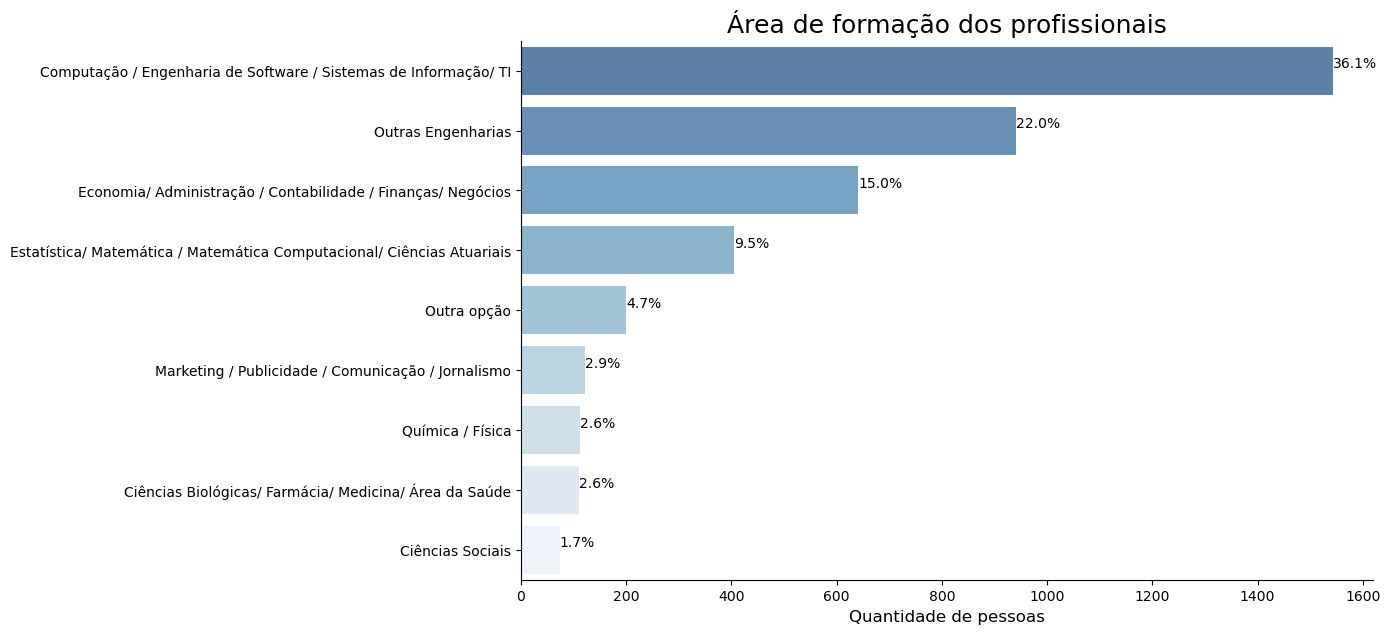

In [164]:
# plotando grafico para melhor visualização


formacao_chart = sns.countplot(y=dados['Área de Formação'], palette='Blues_r', alpha=0.7, order=dados['Área de Formação'].value_counts().index)
formacao_chart.set_xlabel('Quantidade de pessoas', fontsize=12)
formacao_chart.set_ylabel('', fontsize=14)
formacao_chart.set_title('Área de formação dos profissionais', fontsize=18)
formacao_chart.figure.set_size_inches(11,7)
formacao_chart.spines['top'].set_visible(False)
formacao_chart.spines['right'].set_visible(False)

without_hue_h(formacao_chart, dados['Área de Formação'])   

A maioria dos profissionais têm formação na área de TI. Se formos considerar a divisão em áreas de conhecimento de exatas, humans e saúde, o percentual se apresenta da seguinte forma: 85.2, 4.6 e 2.6%. Discrepante a diferença entre as áreas. Obs.: O percentual de 'outra opção' não foi incluído no percentual por área de conhecimento. 

### Cargo 

In [34]:
# Distribuição de pessoas por cargo

dados['Cargo Atual'].value_counts(dropna=False)

NaN                                                                    1290
Analista de Dados/Data Analyst                                          639
Cientista de Dados/Data Scientist                                       556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect     490
Analista de BI/BI Analyst                                               378
Outra Opção                                                             281
Analista de Negócios/Business Analyst                                   123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas             106
Analista de Suporte/Analista Técnico                                     72
Analytics Engineer                                                       70
Engenheiro de Machine Learning/ML Engineer                               69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                       51
Analista de Inteligência de Mercado/Market Intelligence                  29
Outras Engen

In [35]:
# percentualmente

(dados['Cargo Atual'].value_counts(dropna=False, normalize=True)*100).round(2)

NaN                                                                    30.20
Analista de Dados/Data Analyst                                         14.96
Cientista de Dados/Data Scientist                                      13.02
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    11.47
Analista de BI/BI Analyst                                               8.85
Outra Opção                                                             6.58
Analista de Negócios/Business Analyst                                   2.88
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas             2.48
Analista de Suporte/Analista Técnico                                    1.69
Analytics Engineer                                                      1.64
Engenheiro de Machine Learning/ML Engineer                              1.62
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      1.19
Analista de Inteligência de Mercado/Market Intelligence                 0.68

Conforme os percentuais acima, percebi que o maior percentual (30,2%) é de dados nulos. Entendo que outros profissionais que não foram discriminados como estagiários, pesquisadores, etc., escolheram 'outra opção'. Portanto, não entendo o porquê de um número tão alto para nulos.

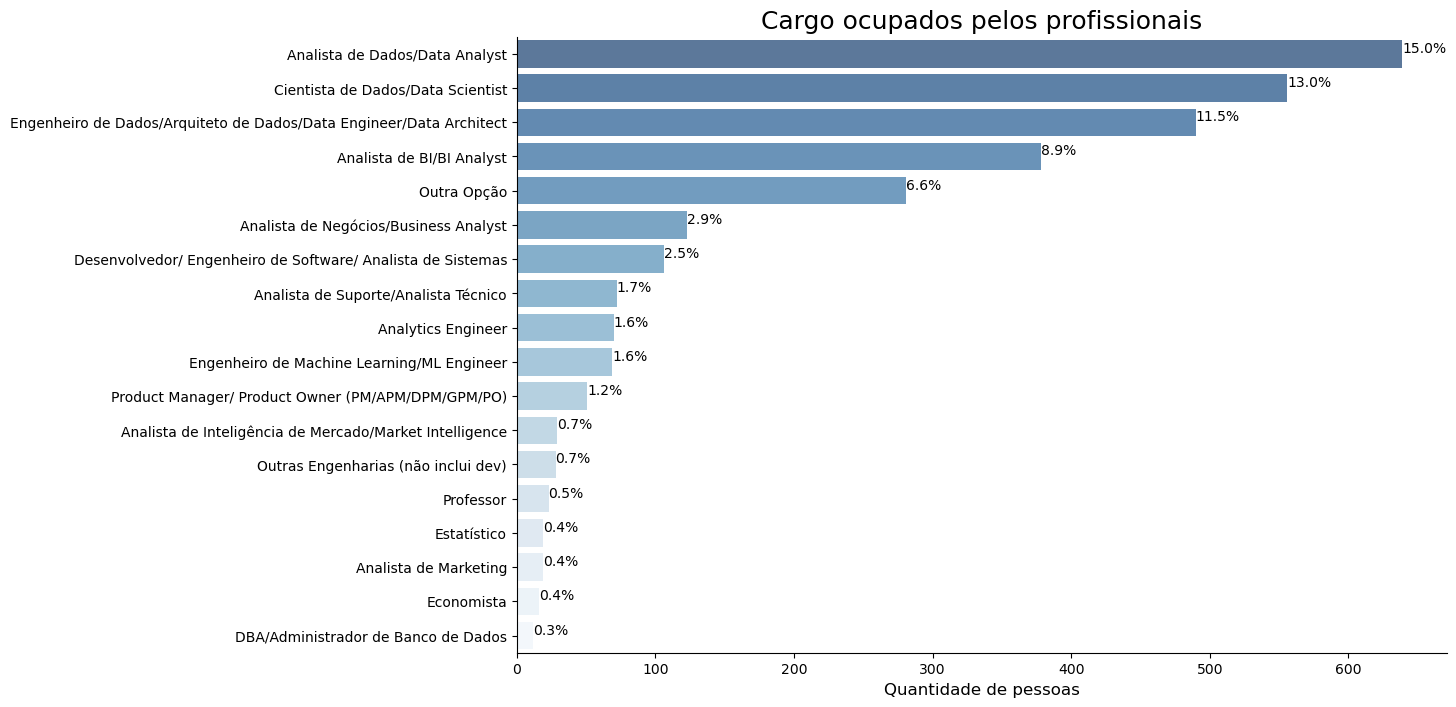

In [36]:
# Plotando gráfico de barras por cargo

cargo_chart = sns.countplot(y=dados['Cargo Atual'], palette='Blues_r', alpha=0.7, order=dados['Cargo Atual'].value_counts().index)
cargo_chart.set_xlabel('Quantidade de pessoas', fontsize=12)
cargo_chart.set_ylabel('')
cargo_chart.figure.set_size_inches(12,8)
cargo_chart.set_title('Cargo ocupados pelos profissionais', fontsize=18)
cargo_chart.spines['top'].set_visible(False)
cargo_chart.spines['right'].set_visible(False)


without_hue_h(cargo_chart, dados['Cargo Atual'])

Conforme o gráfico acima, os três principais cargos ocupados pelos respondentes da pesquisa diz respeito a analistas, cientistas e engenheiros de dados totalizando 39% dos cargos do dataset.Portanto, posteriormente, dedicarei uma análise mais minuciosa desses três cargos.

### Layoff

O cenário econômico instável pós pandêmico desencadeou demissões em massa (layoff), inclusive nas empresas de tecnologia. Portanto, analisei se a empresa que o profissional trabalha passou por layoff bem como se esse foi afetado. Em caso afirmativo, qual a sua situação de trabalho quando do preenchimento da pesquisa.

In [37]:
# Contabilizando valores da coluna de layoff

dados['Sua empresa passu por Layoff em 2022?'].value_counts()

Não ocorreram layoffs/demissões em massa na empresa em que trabalho                         3000
Sim, ocorreram layoffs/demissões em massa na empresa em que trabalho mas não fui afetado     594
Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado      100
Name: Sua empresa passu por Layoff em 2022?, dtype: int64

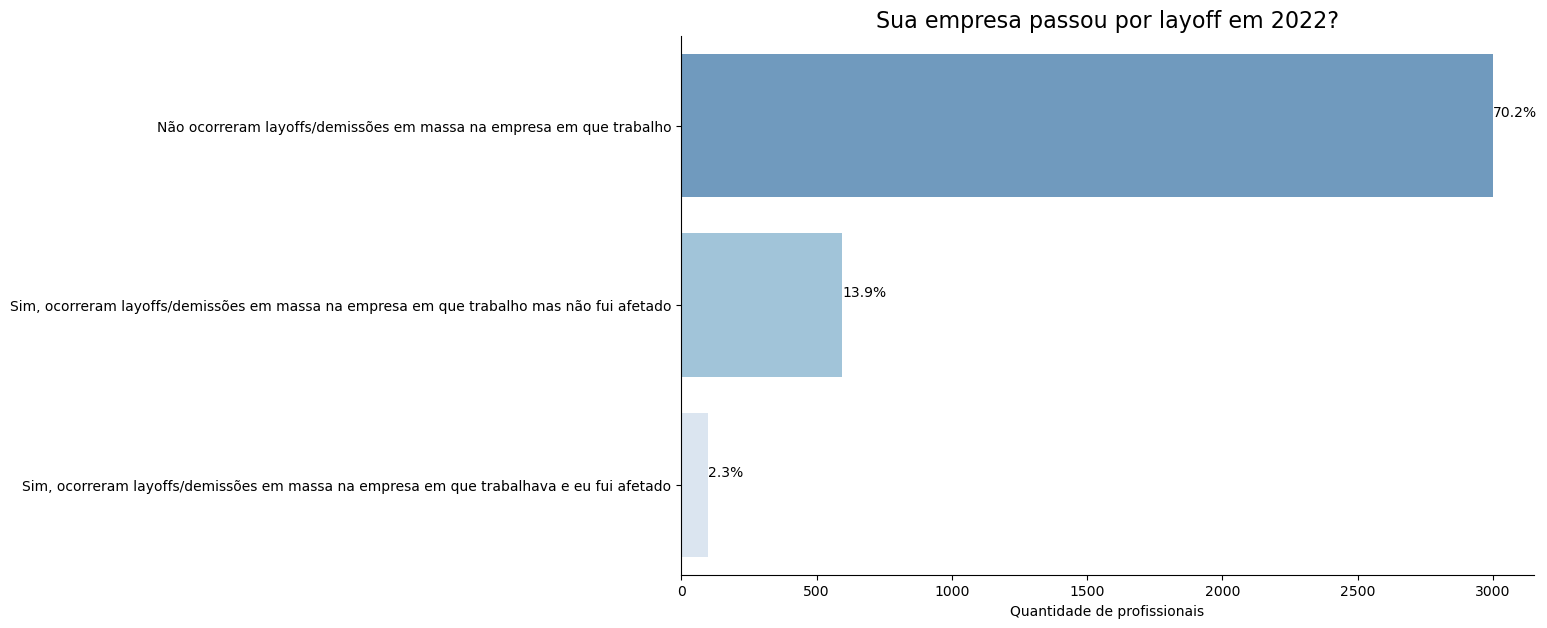

In [38]:
# Plotando gráfico com intuito de melhor visualizar se o profissional foi afetado por layoff

layoff_plot = sns.countplot(y=dados['Sua empresa passu por Layoff em 2022?'], palette='Blues_r', alpha=0.7)
layoff_plot.set_xlabel('Quantidade de pessoas', fontsize=12)
layoff_plot.set_title('Sua empresa passou por layoff em 2022?', fontsize=16)
layoff_plot.figure.set_size_inches(11,7)
layoff_plot.set_xlabel('Quantidade de profissionais', fontsize=10)
layoff_plot.set_ylabel('')
layoff_plot.spines['top'].set_visible(False)
layoff_plot.spines['right'].set_visible(False)

without_hue_h(layoff_plot, dados['Sua empresa passu por Layoff em 2022?'])


                  


Conforme gráfico acima, dos 3694 profissionais respondentes, 2,3% (100 profissionais) foram afetados pelo layoff ocorrido na empresa que trabalhavam. Desta forma, busquei saber a situação de trabalho atual destas pessoas afetadas e, surpreendentemente, nenhuma delas estava sem emprego.

In [39]:

dados[(dados['Qual sua situação atual de trabalho?']=='Desempregado, buscando recolocação') & (dados['Sua empresa passu por Layoff em 2022?']=='Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado')]


,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"


Tendo em vista o resultado anterior, busquei saber a situação atual de trabalho das pessoas afetadas pelo layoff

In [40]:
situacao_afetados = dados[(dados['Sua empresa passu por Layoff em 2022?']=='Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado') & 
      (dados['Qual sua situação atual de trabalho?'])]
situacao_afetados.head()


,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
24,zuojuxpeweah994w947zuojuxpoup3nj,34.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,zpp4jvq3enc5fmgnhzpp4jvckgrsitp7,24.0,22-24,Masculino,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67,zjpwdztcnxrvtingrzh8rk0obyzjpwdz,38.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,zgzg3oj3133trfhka2zgzg3ode54jyg6,25.0,25-29,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,z0a045aomp0u8imsz0a0vvordg4xiu2d,42.0,40-44,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


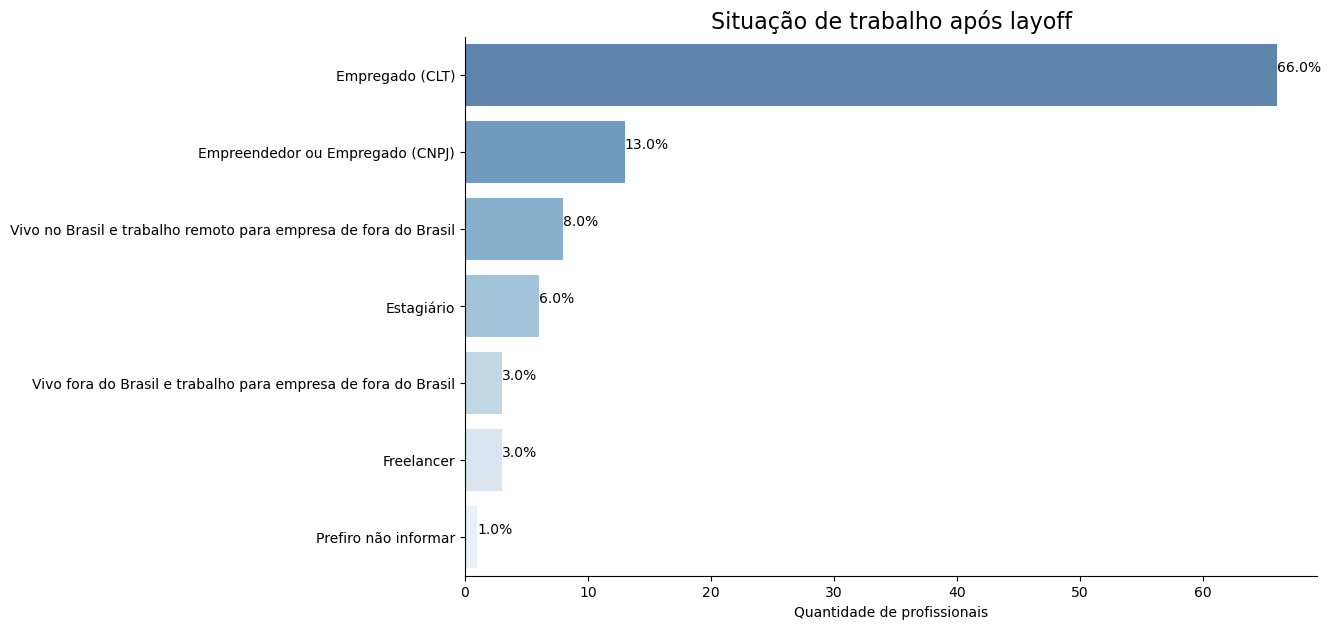

In [41]:
# Gráfico acerca da situação atual de trabalho dos 100 profissionais afetados por layoff

situacao_plot = sns.countplot(y=situacao_afetados['Qual sua situação atual de trabalho?'], palette='Blues_r', alpha=0.7, order=situacao_afetados['Qual sua situação atual de trabalho?'].value_counts().index)
situacao_plot.set_xlabel('Quantidade de pessoas', fontsize=12)
situacao_plot.set_title('Situação de trabalho após layoff', fontsize=16)
situacao_plot.figure.set_size_inches(11,7)
situacao_plot.set_xlabel('Quantidade de profissionais', fontsize=10)
situacao_plot.set_ylabel('')
situacao_plot.spines['top'].set_visible(False)
situacao_plot.spines['right'].set_visible(False)

without_hue_h(situacao_plot, situacao_afetados.values)
   

Conforme gráfico acima, 66% das pessoas que foram afetadas pelo layoff se recolocaram no mercado de trabalho atráves do regime celetista, seguido por 13% que se recolocaram como empreendedores/pessoa júridca (CNPJ) e assim por diante.

### Modelo de trabalho

Atualmente o modelo de trabalho tornou-se um fator decisivo na hora de aceitar e/ou permanecer em um trabalho, já que não há unanimidade acerca do modelo ideal. Dessa forma, contrapus o modelo de trabalho atual versus o modelo considerado ideal pelos profissionais. 

In [42]:
dados['Atualmente qual a sua forma de trabalho?'].value_counts(dropna=False)

Modelo 100% remoto                                                                                                1689
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)     946
Modelo 100% presencial                                                                                             582
NaN                                                                                                                577
Modelo híbrido com dias fixos de trabalho presencial                                                               477
Name: Atualmente qual a sua forma de trabalho?, dtype: int64

In [43]:
dados['Qual a forma de trabalho ideal para você?'].value_counts(dropna=False)

Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)    1939
Modelo 100% remoto                                                                                                1444
NaN                                                                                                                577
Modelo híbrido com dias fixos de trabalho presencial                                                               255
Modelo 100% presencial                                                                                              56
Name: Qual a forma de trabalho ideal para você?, dtype: int64

In [44]:
# Reorganizando meus dados para gerar novo dataframe e, então, plotar gráfico para melhor visualização.

modelo_trabalho = ['Modelo 100% remoto', 
                   'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 
                   'Modelo 100% presencial',
                   'Modelo híbrido com dias fixos de trabalho presencial']

lista_modelo_trabalho = []
lista_atual_ou_ideal = []
lista_quantidade = []


for modelo in modelo_trabalho:
    dados[(dados['Atualmente qual a sua forma de trabalho?']==modelo)]
    lista_modelo_trabalho.append(modelo)
    lista_atual_ou_ideal.append('Atual')
    lista_quantidade.append(dados[(dados['Atualmente qual a sua forma de trabalho?']==modelo)].shape[0])

for modelo in modelo_trabalho:
    dados[(dados['Qual a forma de trabalho ideal para você?']==modelo)]
    lista_modelo_trabalho.append(modelo)
    lista_atual_ou_ideal.append('Ideal')  
    lista_quantidade.append(dados[(dados['Qual a forma de trabalho ideal para você?']==modelo)].shape[0])
    
print(lista_modelo_trabalho)    
print(lista_atual_ou_ideal)
print(lista_quantidade)

['Modelo 100% remoto', 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 'Modelo 100% presencial', 'Modelo híbrido com dias fixos de trabalho presencial', 'Modelo 100% remoto', 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 'Modelo 100% presencial', 'Modelo híbrido com dias fixos de trabalho presencial']
['Atual', 'Atual', 'Atual', 'Atual', 'Ideal', 'Ideal', 'Ideal', 'Ideal']
[1689, 946, 582, 477, 1444, 1939, 56, 255]


In [45]:
# criando um DF a partir das listas acima obtidas

df_modelo_trabalho = pd.DataFrame(list(zip(lista_modelo_trabalho, lista_atual_ou_ideal, lista_quantidade)),
                          columns=['Modelo de trabalho', 'Atual ou ideal', 'Quantidade'])

df_modelo_trabalho

,Modelo de trabalho,Atual ou ideal,Quantidade
0,Modelo 100% remoto,Atual,1689
1,Modelo híbrido flexível (o funcionário tem lib...,Atual,946
2,Modelo 100% presencial,Atual,582
3,Modelo híbrido com dias fixos de trabalho pres...,Atual,477
4,Modelo 100% remoto,Ideal,1444
5,Modelo híbrido flexível (o funcionário tem lib...,Ideal,1939
6,Modelo 100% presencial,Ideal,56
7,Modelo híbrido com dias fixos de trabalho pres...,Ideal,255


In [46]:
# Ajustando valores afim de simplificar a leitura.

df_modelo_trabalho.replace(['Modelo 100% remoto', 
                   'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 
                   'Modelo 100% presencial',
                   'Modelo híbrido com dias fixos de trabalho presencial'],
                   ['Remoto',
                    'Híbrido flexível',
                    'Presencial', 
                    'Híbrido fixo'], inplace=True)
df_modelo_trabalho

,Modelo de trabalho,Atual ou ideal,Quantidade
0,Remoto,Atual,1689
1,Híbrido flexível,Atual,946
2,Presencial,Atual,582
3,Híbrido fixo,Atual,477
4,Remoto,Ideal,1444
5,Híbrido flexível,Ideal,1939
6,Presencial,Ideal,56
7,Híbrido fixo,Ideal,255


In [47]:
# Definindo função para traçar porcentagens nos gráficos de barras verticais que possuem hue

def with_hue(plot, df, number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches] 
    patch = [p for p in plot.patches] 
    for i in range(number_of_categories): 
        total = df[df['Atual ou ideal']=='Atual']['Quantidade'].sum() 
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*number_of_categories + i)]/total)
            x = patch[(j*number_of_categories + i)].get_x() + patch[(j*number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*number_of_categories + i)].get_y() + patch[(j*number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y))
    plt.show()
    


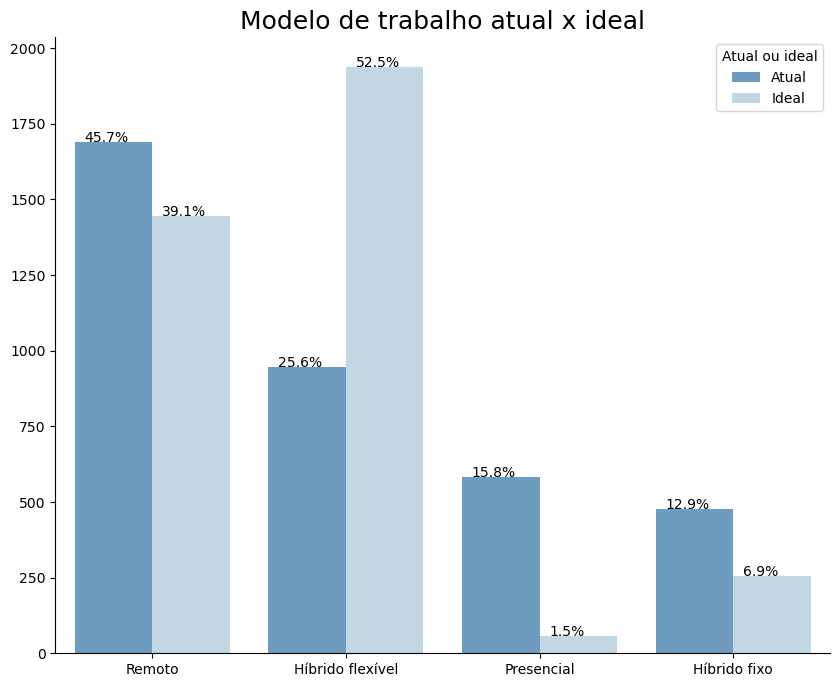

In [48]:
# plotando meu gráfico de barras para melhor visualização

modelo_graph = sns.barplot(data=df_modelo_trabalho, x='Modelo de trabalho', y='Quantidade', hue='Atual ou ideal', palette='Blues_r', alpha=0.8)
modelo_graph.set_xlabel('', fontsize=12)
modelo_graph.set_ylabel('')
modelo_graph.figure.set_size_inches(10,8)
modelo_graph.set_title('Modelo de trabalho atual x ideal', fontsize=18)
modelo_graph.spines['top'].set_visible(False)
modelo_graph.spines['right'].set_visible(False)

with_hue(modelo_graph, df_modelo_trabalho, 4, 2) 



O modelo de trabalho hibrído flexível (onde o profissonal tem a liberdade de escolher quando estar presencialmente no escritório) é considerado o modelo de trabalho atual por mais da metade dos profissionais entrevistados. Por outro lado, o modelo de trabalho presencial é considerado ideal por apenas 1,5% dos respondentes da pesquisa. 

Considerando que quase 75% dos profissionais trabalham pelo regime CLT ou prestando serviço como pessoa jurídica, irei fazer uma análise mais minuciosa desses regimes de trabalho.

olhando muito rapidamente nao consigo observar nenhuma disparidade. Todavia, é importante levar em consideração outros faotres como nivel de senioridade, cargo, etc.. Sera interessante colocar esse topico na analise das 3 principais profissoes?


## Análise exploratória dos três principais cargos: analistas, cientistas e engenheiros de dados

### Gênero

#### Analistas

In [54]:
# Criando um df a partir do original apenas com pessoas que exercem cargo de analista para facilitar as análises, já que serão várias.

dados_analistas = dados[dados['Cargo Atual']=='Analista de Dados/Data Analyst']
dados_analistas.head()

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
19,zvqn9oqa49zuuuvl6zvqn9gxfr6ac8ni,26.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Nível...",True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,zt5dof3zrmdbx6jwplibzt5dokirwt6g,26.0,25-29,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,zpr1ez4i5wmm6a6ocd3zpr1ez4iff895,24.0,22-24,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...","Aprovação em processos seletivos/entrevistas, ...",True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,znhzqtstcfhf1jnm7bvlt0znhzqt2ukv,33.0,30-34,Masculino,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,zk0gb0ne7c82of94h08mqzk0gb0sd59h,NaN,55+,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...",Oportunidades de progressão de carreira,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
dados_analistas.describe()

,Idade,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
count,630.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,639.000000,639.000000,...,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.0,45.000000,45.0,45.000000
mean,29.312698,0.510204,0.442177,0.047619,0.190476,0.190476,0.142857,0.489796,0.774648,0.212833,...,0.644444,0.222222,0.222222,0.044444,0.0,0.177778,0.0,0.044444,0.0,0.022222
std,5.600562,0.501605,0.498343,0.213687,0.394019,0.394019,0.351123,0.501605,0.418141,0.409631,...,0.484090,0.420437,0.420437,0.208409,0.0,0.386646,0.0,0.208409,0.0,0.149071
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,32.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


In [56]:
dados_analistas.shape

(639, 353)

In [57]:
dados_analistas['Genero'].value_counts()

Masculino               446
Feminino                189
Prefiro não informar      3
Name: Genero, dtype: int64

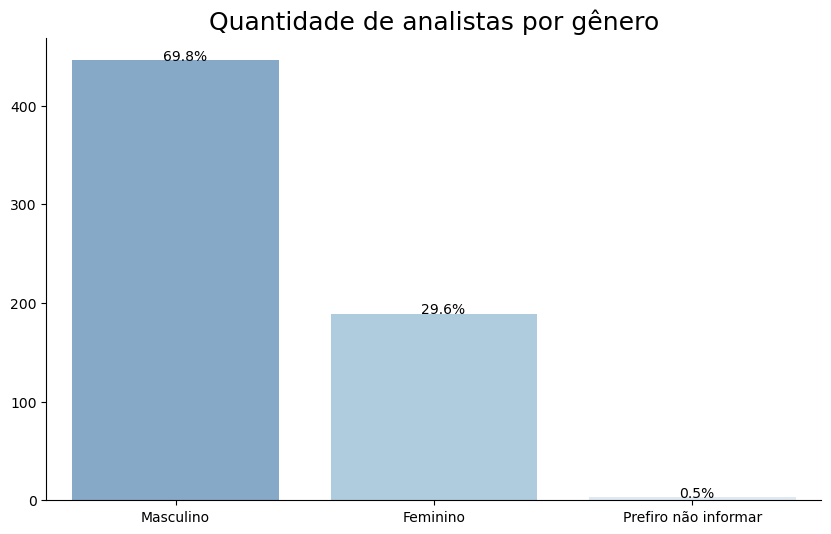

In [58]:
# Plotando gráfico para melhor visualizar a quantidade de pessoas por genero


analista_genero = sns.countplot(x=dados_analistas['Genero'], palette='Blues_r', alpha=0.6, order=dados_analistas['Genero'].value_counts().index)
analista_genero.set_xlabel('', fontsize=13)
analista_genero.set_ylabel('', fontsize=14)
analista_genero.set_title('Quantidade de analistas por gênero', fontsize=18)
analista_genero.figure.set_size_inches(10,6)
analista_genero.spines['top'].set_visible(False)
analista_genero.spines['right'].set_visible(False)


without_hue_v(analista_genero, dados_analistas['Genero'])

Em comparação à análise geral, quando verificamos apenas esse recorte do cargo de analista, houve um acréscimo na presença feminina que passou de 24,7 para 29,6%. Não obstante, a quantidade de homens continua bem superior a das mulheres.

#### Cientistas

In [59]:
# Criando um df apenas com analistas para facilitar as análises, uma vez que serão várias.


dados_cientistas = dados[dados['Cargo Atual']=='Cientista de Dados/Data Scientist']
dados_cientistas.head()


,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,zuhhq9fel0z0pvqp40zuhv08csrove98,27.0,25-29,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,ztbhv15fpds52sbni5ztbhs4omjmsq8t,25.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38,zr7f2ykmr4ow6bu8zr7nyrdnjo5nfseb,31.0,30-34,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Rio Grande do Sul (RS),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45,zpt1ql0xnx7m9sm3lyugzpt1qi80egk1,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dados_cientistas.describe()

,Idade,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
count,553.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,556.000000,556.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,29.748644,0.378049,0.487805,0.036585,0.170732,0.195122,0.121951,0.500000,0.784173,0.178058,...,0.492569,0.273885,0.350318,0.070064,0.048832,0.046709,0.004246,0.027601,0.006369,0.010616
std,5.555723,0.487884,0.502927,0.188897,0.378590,0.398733,0.329243,0.503077,0.411766,0.382906,...,0.500476,0.446425,0.477577,0.255526,0.215746,0.211239,0.065094,0.164000,0.079639,0.102593
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
dados_cientistas.shape

(556, 353)

In [62]:

dados_cientistas['Genero'].value_counts()

Masculino               424
Feminino                129
Prefiro não informar      1
Name: Genero, dtype: int64

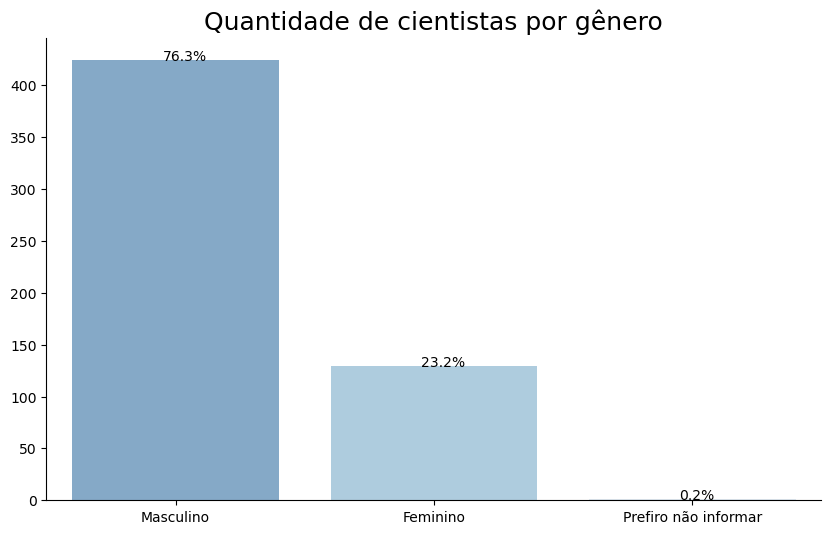

In [63]:
# Plotando gráfico para melhor visualizar a quantidade de pessoas por genero


cientista_genero = sns.countplot(x=dados_cientistas['Genero'], palette='Blues_r', alpha=0.6, order=dados_cientistas['Genero'].value_counts().index)
cientista_genero.set_xlabel('', fontsize=13)
cientista_genero.set_ylabel('', fontsize=14)
cientista_genero.set_title('Quantidade de cientistas por gênero', fontsize=18)
cientista_genero.figure.set_size_inches(10,6)
cientista_genero.spines['top'].set_visible(False)
cientista_genero.spines['right'].set_visible(False)


without_hue_v(cientista_genero, dados_cientistas['Genero'])

Enquanto na análise geral o percentual de mulheres é de 24,7%, o percentual de cientistas é de 23,2%, ou seja, houve um decréscimo.

#### Engenheiros

In [64]:
# Criando um df apenas para engenheiros a afim de facilitar as análises, visto que serão várias


dados_engenheiros = dados[dados['Cargo Atual']=='Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']
dados_engenheiros.head()


,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
18,zvxmpvomdin7czvxmitgmiu47m41ydje,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,zsymngsu1xbtuwwltj0exzsymng8gt8f,27.0,25-29,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Paraná (PR),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,zrhp1b3nf1vyxj7evey4yzrhp1b315mp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Rio Grande do Sul (RS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,zqyjbvgkpzkdp6sgxzqyjh83rda63i0v,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Rio de Janeiro (RJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
dados_engenheiros.shape

(490, 353)

In [66]:
dados_engenheiros.describe()

,Idade,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,...,Coletando e limpando os dados que uso para análise e modelagem.,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)"
count,484.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,490.000000,490.000000,...,4.00000,4.0,4.00,4.00,4.00,4.00,4.0,4.0,4.0,4.0
mean,30.221074,0.393258,0.460674,0.044944,0.101124,0.359551,0.168539,0.370787,0.795918,0.208163,...,0.50000,0.0,0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0
std,6.433180,0.491241,0.501275,0.208355,0.303200,0.482588,0.376465,0.485752,0.403441,0.406409,...,0.57735,0.0,0.50,0.50,0.50,0.50,0.0,0.0,0.0,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.50000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
75%,34.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.00000,0.0,0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0
max,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,0.0,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0


In [67]:
dados_engenheiros['Genero'].value_counts()

Masculino               389
Feminino                 99
Prefiro não informar      2
Name: Genero, dtype: int64

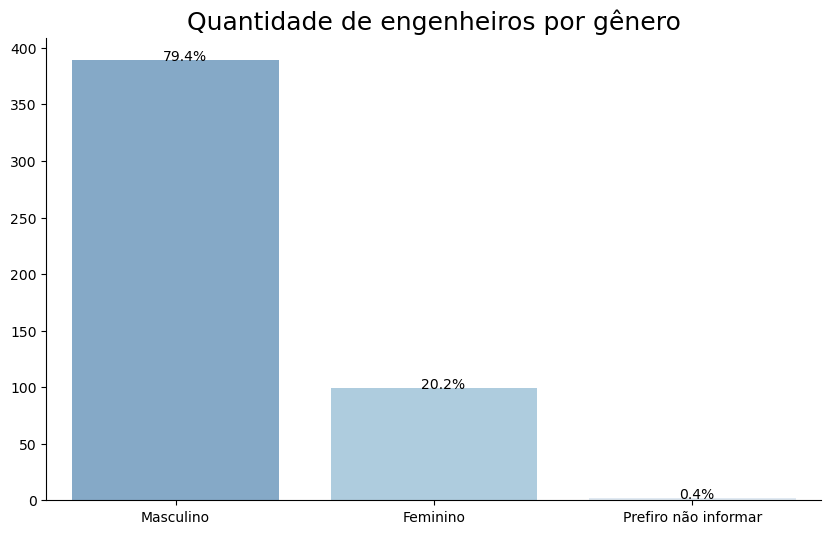

In [68]:
# Plotando gráfico para melhor visualizar a quantidade de pessoas por genero


engenheiro_genero = sns.countplot(x=dados_engenheiros['Genero'], palette='Blues_r', alpha=0.6, order=dados_engenheiros['Genero'].value_counts().index)
engenheiro_genero.set_xlabel('', fontsize=13)
engenheiro_genero.set_ylabel('', fontsize=14)
engenheiro_genero.set_title('Quantidade de engenheiros por gênero', fontsize=18)
engenheiro_genero.figure.set_size_inches(10,6)
engenheiro_genero.spines['top'].set_visible(False)
engenheiro_genero.spines['right'].set_visible(False)


without_hue_v(engenheiro_genero, dados_engenheiros['Genero'])

O percentual de engenheiras é o menor dentre as profissoes analisadas, apenas 20,2%

### Nível de senioridade x faixa salarial

#### Júnior

##### Analistas

In [69]:
dados_analistas['Nivel'].value_counts()

Pleno     236
Júnior    229
Sênior    174
Name: Nivel, dtype: int64

In [71]:

dados_analistas[dados_analistas['Nivel']=='Júnior']['Faixa salarial'].value_counts()

de R$ 4.001/mês a R$ 6.000/mês     73
de R$ 3.001/mês a R$ 4.000/mês     58
de R$ 2.001/mês a R$ 3.000/mês     44
de R$ 1.001/mês a R$ 2.000/mês     33
de R$ 6.001/mês a R$ 8.000/mês     15
Menos de R$ 1.000/mês               4
de R$ 8.001/mês a R$ 12.000/mês     2
Name: Faixa salarial, dtype: int64

In [169]:
# Verificando se minha variável é categórica. Em caso negativo, fazer conversão


dados_analistas['Faixa salarial'].unique()

array(['de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 2.001/mês a R$ 3.000/mês',
       'de R$ 30.001/mês a R$ 40.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês', 'Menos de R$ 1.000/mês',
       'Acima de R$ 40.001/mês'], dtype=object)

In [170]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.

faixa_analistas_cat_type = pd.CategoricalDtype(categories=['Acima de R$ 40.001/mês', 
                                                           'de R$ 30.001/mês a R$ 40.000/mês',
                                                           'de R$ 25.001/mês a R$ 30.000/mês',
                                                           'de R$ 20.001/mês a R$ 25.000/mês',
                                                           'de R$ 16.001/mês a R$ 20.000/mês', 
                                                           'de R$ 12.001/mês a R$ 16.000/mês',
                                                           'de R$ 8.001/mês a R$ 12.000/mês', 
                                                           'de R$ 6.001/mês a R$ 8.000/mês',
                                                           'de R$ 4.001/mês a R$ 6.000/mês',
                                                           'de R$ 3.001/mês a R$ 4.000/mês', 
                                                           'de R$ 2.001/mês a R$ 3.000/mês',
                                                           'de R$ 1.001/mês a R$ 2.000/mês',
                                                           'Menos de R$ 1.000/mês'
                                                        ], ordered=True)
dados_analistas['Faixa salarial'] = dados_analistas['Faixa salarial'].astype(faixa_analistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico

C:\Users\maari\AppData\Local\Temp\ipykernel_12976\1898490113.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analistas['Faixa salarial'] = dados_analistas['Faixa salarial'].astype(faixa_analistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [171]:
dados_analistas['Faixa salarial'].unique()

['de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês', ..., 'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 16.001/mês a R$ 20.000/mês', 'Menos de R$ 1.000/mês', 'Acima de R$ 40.001/mês']
Length: 13
Categories (13, object): ['Acima de R$ 40.001/mês' < 'de R$ 30.001/mês a R$ 40.000/mês' < 'de R$ 25.001/mês a R$ 30.000/mês' < 'de R$ 20.001/mês a R$ 25.000/mês' ... 'de R$ 3.001/mês a R$ 4.000/mês' < 'de R$ 2.001/mês a R$ 3.000/mês' < 'de R$ 1.001/mês a R$ 2.000/mês' < 'Menos de R$ 1.000/mês']

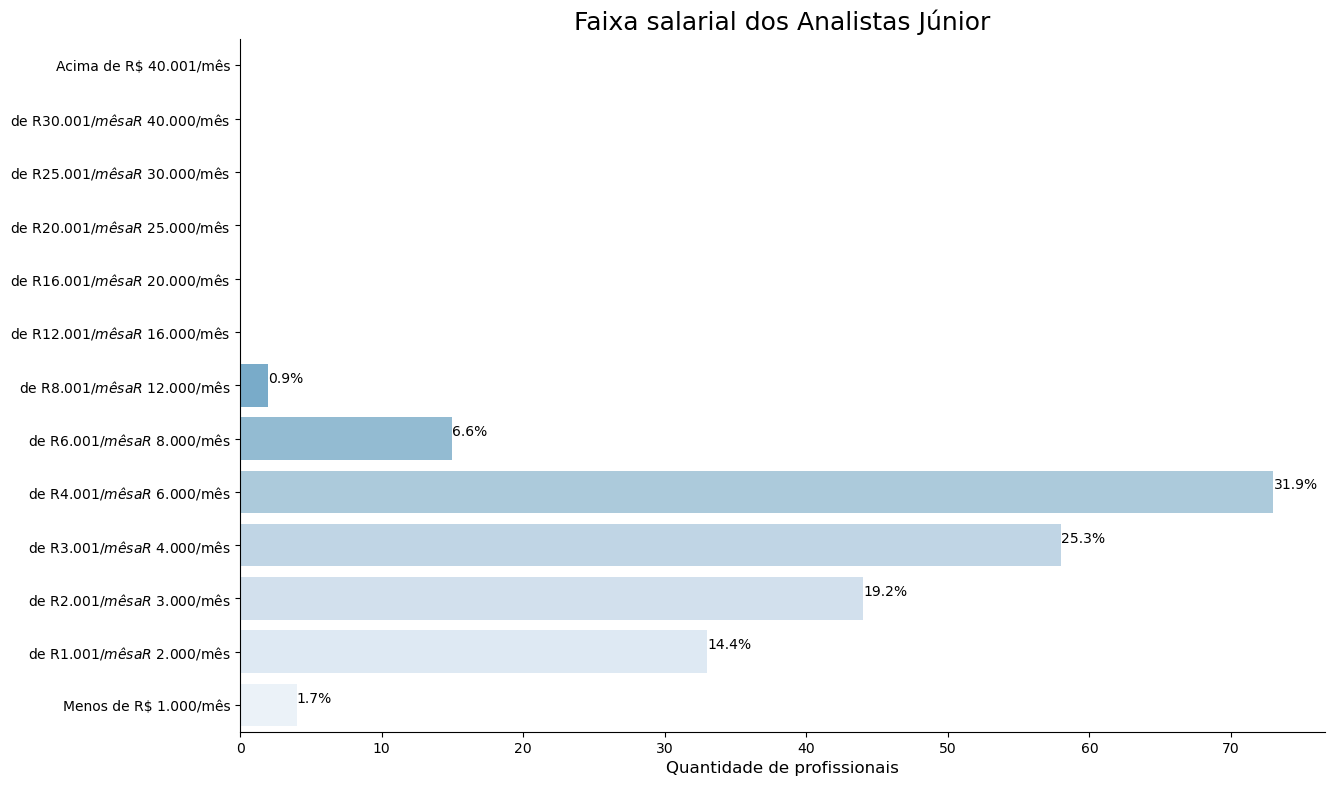

In [173]:
# Plotando gráfico de analistas júnior conforme faixa salarial


faixa_analista_jr = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Júnior']['Faixa salarial'], palette='Blues_r')
faixa_analista_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_analista_jr.set_ylabel('')
faixa_analista_jr.set_title('Faixa salarial dos Analistas Júnior', fontsize= 18)
faixa_analista_jr.figure.set_size_inches(14,9)
faixa_analista_jr.spines['top'].set_visible(False)
faixa_analista_jr.spines['right'].set_visible(False)


without_hue_h(faixa_analista_jr, dados_analistas[dados_analistas['Nivel']=='Júnior']['Faixa salarial'])

A faixa salarial entre 3 e 6 mil reais compreende quase 60% dos analistas júnior.

##### Cientistas

In [74]:
dados_cientistas['Faixa salarial'].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     141
de R$ 6.001/mês a R$ 8.000/mês      105
de R$ 12.001/mês a R$ 16.000/mês     96
de R$ 4.001/mês a R$ 6.000/mês       75
de R$ 2.001/mês a R$ 3.000/mês       33
de R$ 16.001/mês a R$ 20.000/mês     32
de R$ 3.001/mês a R$ 4.000/mês       25
de R$ 1.001/mês a R$ 2.000/mês       16
de R$ 20.001/mês a R$ 25.000/mês     10
de R$ 30.001/mês a R$ 40.000/mês     10
Acima de R$ 40.001/mês                5
de R$ 25.001/mês a R$ 30.000/mês      4
Menos de R$ 1.000/mês                 4
Name: Faixa salarial, dtype: int64

In [76]:
dados_cientistas[dados_cientistas['Nivel']=='Júnior']['Faixa salarial'].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      49
de R$ 6.001/mês a R$ 8.000/mês      46
de R$ 2.001/mês a R$ 3.000/mês      30
de R$ 3.001/mês a R$ 4.000/mês      23
de R$ 8.001/mês a R$ 12.000/mês     16
de R$ 1.001/mês a R$ 2.000/mês      16
Menos de R$ 1.000/mês                4
de R$ 12.001/mês a R$ 16.000/mês     1
Name: Faixa salarial, dtype: int64

In [174]:
# Verificando se minha variável é categórica. Em caso negativo, fazer conversão


dados_cientistas['Faixa salarial'].unique()

array(['de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
       'de R$ 2.001/mês a R$ 3.000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês', 'Acima de R$ 40.001/mês',
       'Menos de R$ 1.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês'],
      dtype=object)

In [175]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.


faixa_cientistas_cat_type = pd.CategoricalDtype(categories=['Acima de R$ 40.001/mês',
                                                           'de R$ 30.001/mês a R$ 40.000/mês',
                                                           'de R$ 25.001/mês a R$ 30.000/mês',
                                                           'de R$ 20.001/mês a R$ 25.000/mês',
                                                           'de R$ 16.001/mês a R$ 20.000/mês',
                                                           'de R$ 12.001/mês a R$ 16.000/mês',
                                                           'de R$ 8.001/mês a R$ 12.000/mês',
                                                           'de R$ 6.001/mês a R$ 8.000/mês',
                                                           'de R$ 4.001/mês a R$ 6.000/mês',
                                                           'de R$ 3.001/mês a R$ 4.000/mês',
                                                           'de R$ 2.001/mês a R$ 3.000/mês',
                                                           'de R$ 1.001/mês a R$ 2.000/mês',
                                                           'Menos de R$ 1.000/mês'
                                                        ], ordered=True)
dados_cientistas['Faixa salarial'] = dados_cientistas['Faixa salarial'].astype(faixa_cientistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


C:\Users\maari\AppData\Local\Temp\ipykernel_12976\75186993.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cientistas['Faixa salarial'] = dados_cientistas['Faixa salarial'].astype(faixa_cientistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [176]:
dados_cientistas['Faixa salarial'].unique()

['de R$ 12.001/mês a R$ 16.000/mês', 'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 25.001/mês a R$ 30.000/mês', ..., 'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês', 'Acima de R$ 40.001/mês', 'Menos de R$ 1.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês']
Length: 13
Categories (13, object): ['Acima de R$ 40.001/mês' < 'de R$ 30.001/mês a R$ 40.000/mês' < 'de R$ 25.001/mês a R$ 30.000/mês' < 'de R$ 20.001/mês a R$ 25.000/mês' ... 'de R$ 3.001/mês a R$ 4.000/mês' < 'de R$ 2.001/mês a R$ 3.000/mês' < 'de R$ 1.001/mês a R$ 2.000/mês' < 'Menos de R$ 1.000/mês']

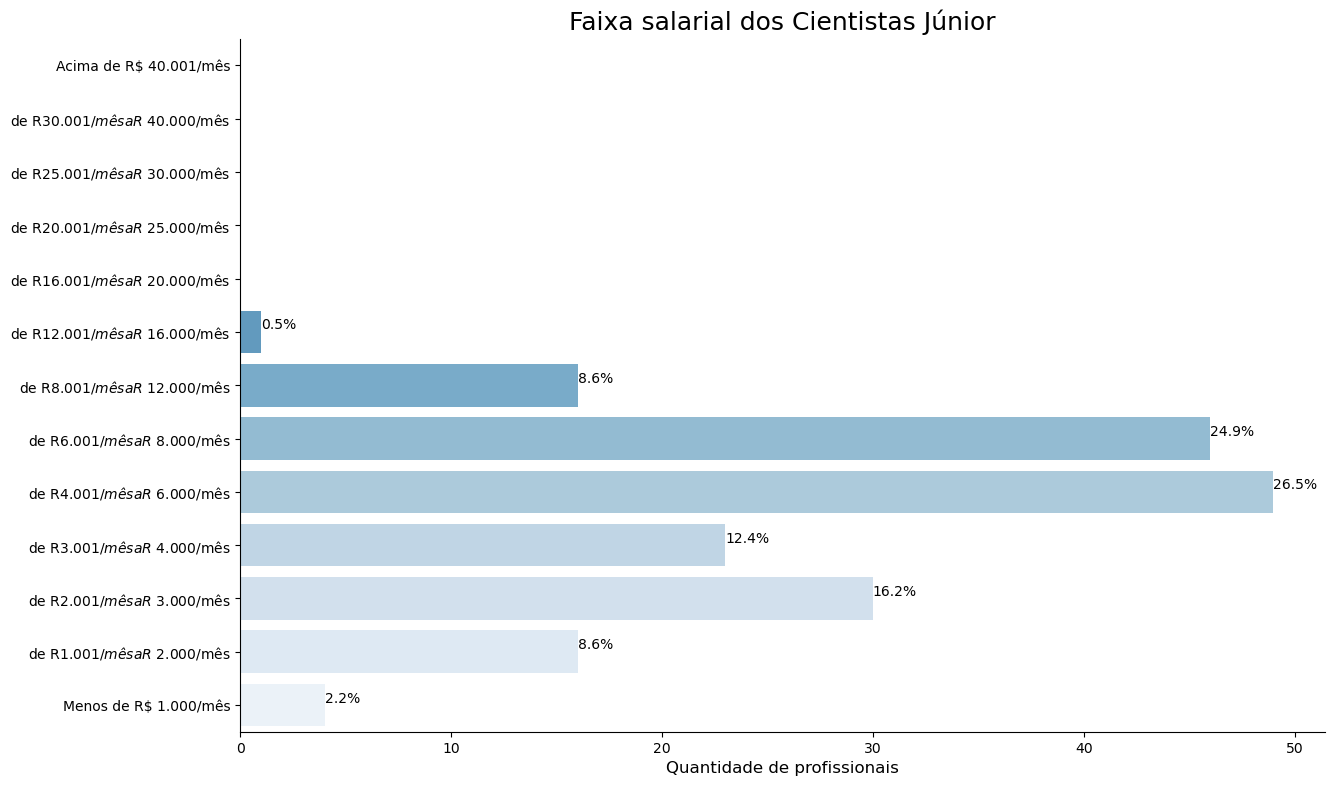

In [177]:
# Plotando gráfico de cientistas júnior conforme faixa salarial


faixa_cientista_jr = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Júnior']['Faixa salarial'], palette='Blues_r')
faixa_cientista_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_cientista_jr.set_ylabel('')
faixa_cientista_jr.set_title('Faixa salarial dos Cientistas Júnior', fontsize= 18)
faixa_cientista_jr.figure.set_size_inches(14,9)
faixa_cientista_jr.spines['top'].set_visible(False)
faixa_cientista_jr.spines['right'].set_visible(False)


without_hue_h(faixa_cientista_jr, dados_cientistas[dados_cientistas['Nivel']=='Júnior']['Faixa salarial'])

Cerca de 50% dos cientistas junior recebe 4 e 8 mil reais mensais. 


##### Engenheiros

In [79]:
dados_engenheiros['Faixa salarial'].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     132
de R$ 12.001/mês a R$ 16.000/mês     90
de R$ 4.001/mês a R$ 6.000/mês       76
de R$ 6.001/mês a R$ 8.000/mês       75
de R$ 1.001/mês a R$ 2.000/mês       23
de R$ 16.001/mês a R$ 20.000/mês     23
de R$ 3.001/mês a R$ 4.000/mês       21
de R$ 2.001/mês a R$ 3.000/mês       19
de R$ 20.001/mês a R$ 25.000/mês     12
de R$ 25.001/mês a R$ 30.000/mês      7
Acima de R$ 40.001/mês                6
de R$ 30.001/mês a R$ 40.000/mês      6
Name: Faixa salarial, dtype: int64

In [81]:
dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Faixa salarial'].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      39
de R$ 6.001/mês a R$ 8.000/mês      26
de R$ 1.001/mês a R$ 2.000/mês      23
de R$ 2.001/mês a R$ 3.000/mês      18
de R$ 3.001/mês a R$ 4.000/mês      17
de R$ 8.001/mês a R$ 12.000/mês      5
de R$ 16.001/mês a R$ 20.000/mês     2
de R$ 30.001/mês a R$ 40.000/mês     1
de R$ 20.001/mês a R$ 25.000/mês     1
Name: Faixa salarial, dtype: int64

In [178]:
# Verificando se minha variável é categórica. Em caso negativo, fazer conversão


dados_engenheiros['Faixa salarial'].unique()

array(['de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
       'Acima de R$ 40.001/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 30.001/mês a R$ 40.000/mês'], dtype=object)

In [179]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.


faixa_engenheiros_cat_type = pd.CategoricalDtype(categories=['Acima de R$ 40.001/mês',
                                                           'de R$ 30.001/mês a R$ 40.000/mês',
                                                           'de R$ 25.001/mês a R$ 30.000/mês',
                                                           'de R$ 20.001/mês a R$ 25.000/mês',
                                                           'de R$ 16.001/mês a R$ 20.000/mês',
                                                           'de R$ 12.001/mês a R$ 16.000/mês',
                                                           'de R$ 8.001/mês a R$ 12.000/mês',
                                                           'de R$ 6.001/mês a R$ 8.000/mês',
                                                           'de R$ 4.001/mês a R$ 6.000/mês',
                                                           'de R$ 3.001/mês a R$ 4.000/mês',
                                                           'de R$ 2.001/mês a R$ 3.000/mês',
                                                           'de R$ 1.001/mês a R$ 2.000/mês',
                                                           'Menos de R$ 1.000/mês'
                                                        ], ordered=True)
dados_engenheiros['Faixa salarial'] = dados_engenheiros['Faixa salarial'].astype(faixa_engenheiros_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


C:\Users\maari\AppData\Local\Temp\ipykernel_12976\3150125922.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_engenheiros['Faixa salarial'] = dados_engenheiros['Faixa salarial'].astype(faixa_engenheiros_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [180]:
dados_engenheiros['Faixa salarial'].unique()

['de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês', 'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 8.001/mês a R$ 12.000/mês', ..., 'Acima de R$ 40.001/mês', 'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês']
Length: 12
Categories (13, object): ['Acima de R$ 40.001/mês' < 'de R$ 30.001/mês a R$ 40.000/mês' < 'de R$ 25.001/mês a R$ 30.000/mês' < 'de R$ 20.001/mês a R$ 25.000/mês' ... 'de R$ 3.001/mês a R$ 4.000/mês' < 'de R$ 2.001/mês a R$ 3.000/mês' < 'de R$ 1.001/mês a R$ 2.000/mês' < 'Menos de R$ 1.000/mês']

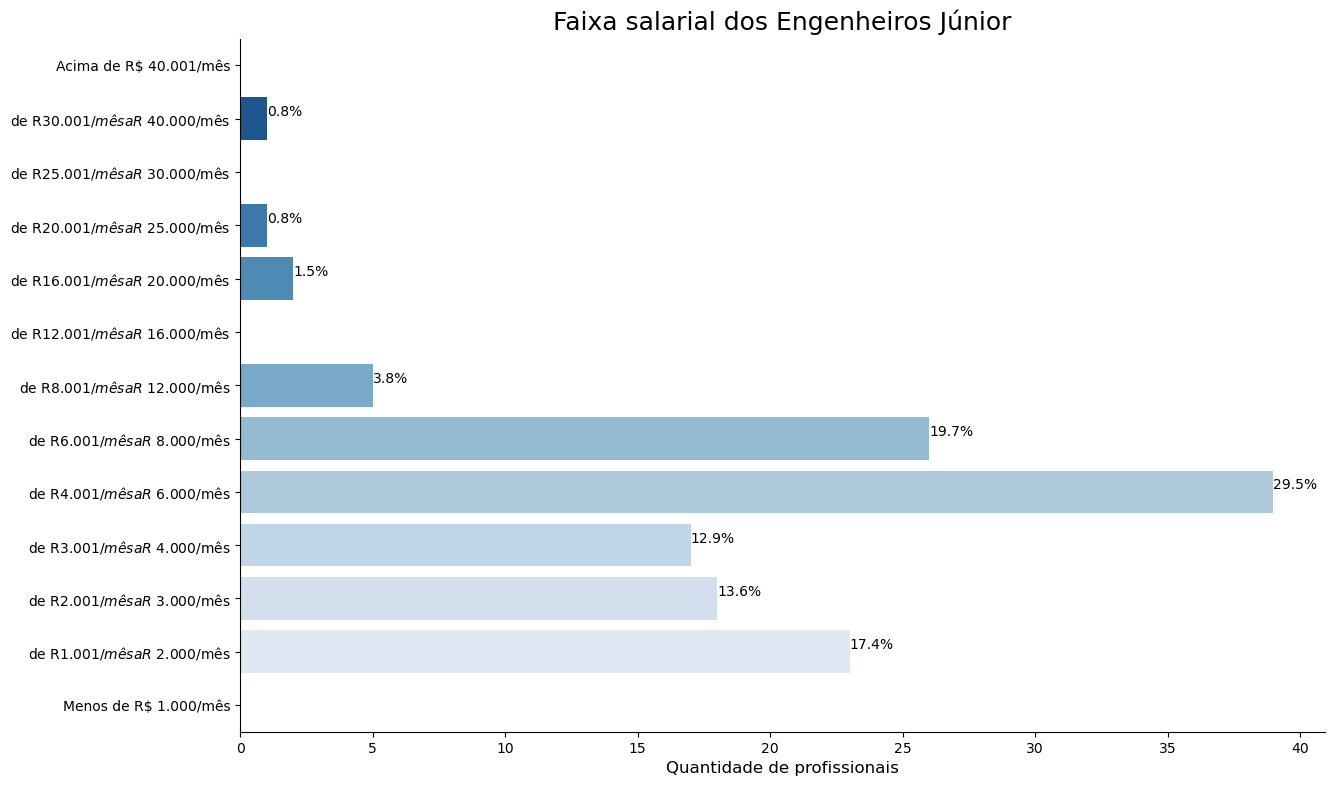

In [181]:
# Plotando gráfico de engenheiro júnior conforme faixa salarial


faixa_engenheiro_jr = sns.countplot(y=dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Faixa salarial'], palette='Blues_r')
faixa_engenheiro_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_engenheiro_jr.set_ylabel('')
faixa_engenheiro_jr.set_title('Faixa salarial dos Engenheiros Júnior', fontsize= 18)
faixa_engenheiro_jr.figure.set_size_inches(14,9)
faixa_engenheiro_jr.spines['top'].set_visible(False)
faixa_engenheiro_jr.spines['right'].set_visible(False)


without_hue_h(faixa_engenheiro_jr, dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Faixa salarial'])


Quase 50% dos engenheiros júnior recebem mensalmente de 4 a 8 mil reais. Vale destacar que cerca de 3% recebem mensalmente valores acima de 16 mil reais mensais. Não podemos concluir se esses valores são corretos ou se tratam de outliers.

Conclusão: os analistas junior possuem a menor faixa salarial (3 a 6 mil reais mensais, enquanto que a faixa salarial predominante entre cientistas e engenheiros é de 4 a 8 mil reais. Vale destacar que cerca de 3% dos engenheiros junior recebem mensalmente valores acima de 16 mil reais mensais. Não podemos concluir se esses valores são corretos ou se tratam de outliers.

#### Pleno

##### Analistas

In [84]:
dados_analistas[dados_analistas['Nivel']=='Pleno']['Faixa salarial'].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      78
de R$ 6.001/mês a R$ 8.000/mês      67
de R$ 8.001/mês a R$ 12.000/mês     55
de R$ 3.001/mês a R$ 4.000/mês      18
de R$ 12.001/mês a R$ 16.000/mês     8
de R$ 2.001/mês a R$ 3.000/mês       5
de R$ 20.001/mês a R$ 25.000/mês     2
de R$ 25.001/mês a R$ 30.000/mês     1
de R$ 1.001/mês a R$ 2.000/mês       1
de R$ 16.001/mês a R$ 20.000/mês     1
Name: Faixa salarial, dtype: int64

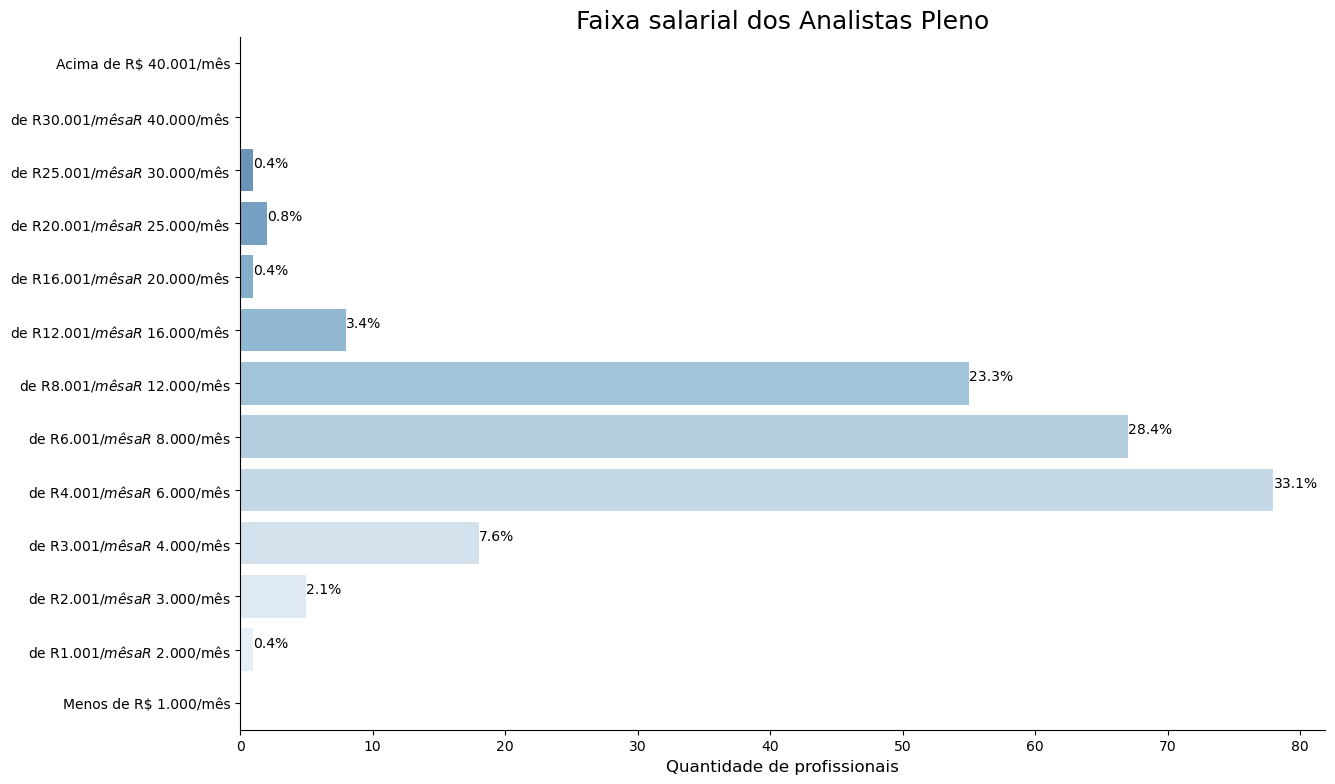

In [182]:
# Plotando gráfico de analistas pleno conforme faixa salarial


faixa_analista_pleno = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Pleno']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_analista_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_analista_pleno.set_ylabel('')
faixa_analista_pleno.set_title('Faixa salarial dos Analistas Pleno', fontsize= 18)
faixa_analista_pleno.figure.set_size_inches(14,9)
faixa_analista_pleno.spines['top'].set_visible(False)
faixa_analista_pleno.spines['right'].set_visible(False)


without_hue_h(faixa_analista_pleno, dados_analistas[dados_analistas['Nivel']=='Pleno']['Faixa salarial'])

33% dos analistas pleno recebem mensalmente entre 4 e 6 mil reais, 28% de 6 a 8 mil reais e 23% de 8 a 12 mil reais mensais.

##### Cientistas

In [86]:
dados_cientistas[dados_cientistas['Nivel']=='Pleno']['Faixa salarial'].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     66
de R$ 6.001/mês a R$ 8.000/mês      55
de R$ 12.001/mês a R$ 16.000/mês    26
de R$ 4.001/mês a R$ 6.000/mês      23
de R$ 16.001/mês a R$ 20.000/mês     7
Acima de R$ 40.001/mês               3
de R$ 2.001/mês a R$ 3.000/mês       3
de R$ 25.001/mês a R$ 30.000/mês     2
de R$ 20.001/mês a R$ 25.000/mês     2
de R$ 3.001/mês a R$ 4.000/mês       2
de R$ 30.001/mês a R$ 40.000/mês     2
Name: Faixa salarial, dtype: int64

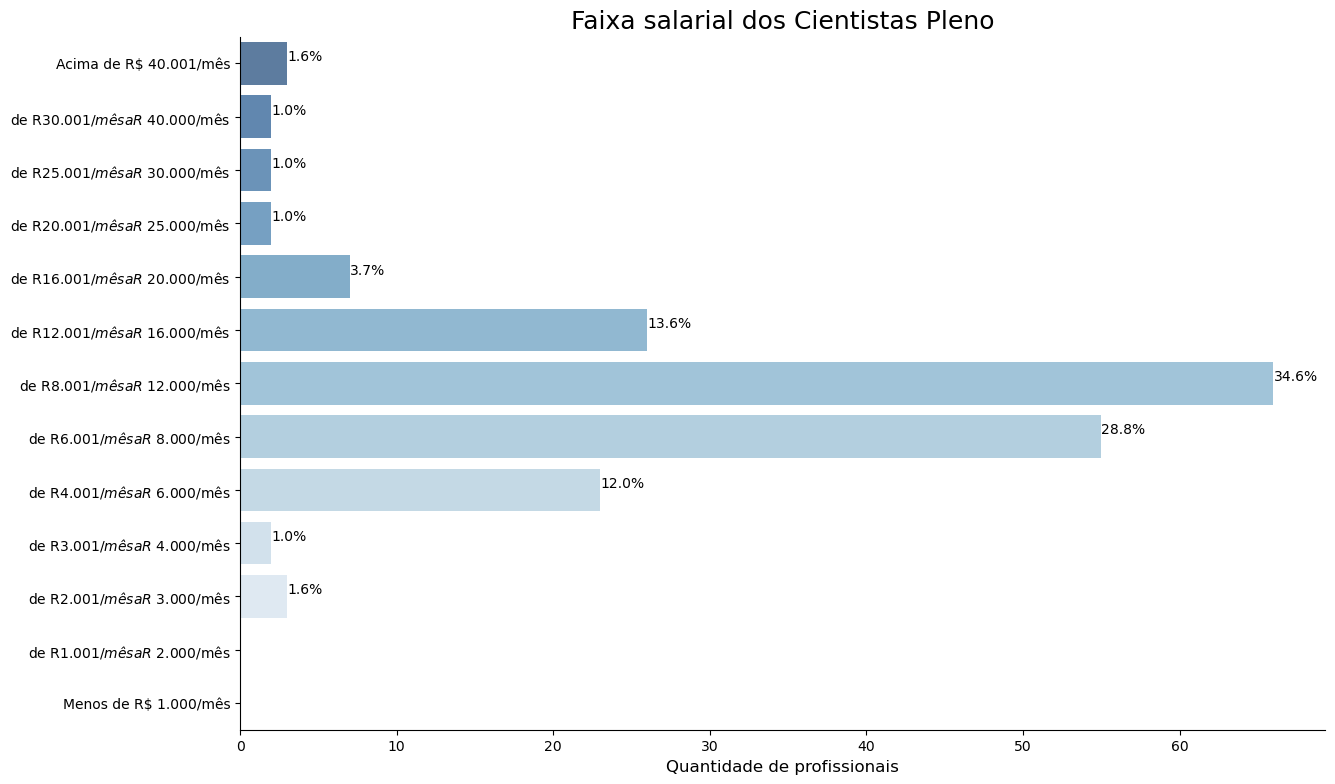

In [183]:
# Plotando gráfico de cientistas pleno conforme faixa salarial


faixa_cientista_pleno = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Pleno']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_cientista_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_cientista_pleno.set_ylabel('')
faixa_cientista_pleno.set_title('Faixa salarial dos Cientistas Pleno', fontsize= 18)
faixa_cientista_pleno.figure.set_size_inches(14,9)
faixa_cientista_pleno.spines['top'].set_visible(False)
faixa_cientista_pleno.spines['right'].set_visible(False)


without_hue_h(faixa_cientista_pleno, dados_cientistas[dados_cientistas['Nivel']=='Pleno']['Faixa salarial'])

34 % dos cientistas pleno recebem de 8 a 12 mil reais mensais. Vale destacar que 4,6% alegam receber salários superiores a 20 mil reais mensais.

##### Engenheiros

In [88]:
dados_engenheiros[dados_engenheiros['Nivel']=='Pleno']['Faixa salarial'].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     74
de R$ 6.001/mês a R$ 8.000/mês      46
de R$ 4.001/mês a R$ 6.000/mês      35
de R$ 12.001/mês a R$ 16.000/mês    18
de R$ 3.001/mês a R$ 4.000/mês       3
de R$ 16.001/mês a R$ 20.000/mês     2
de R$ 25.001/mês a R$ 30.000/mês     1
de R$ 2.001/mês a R$ 3.000/mês       1
de R$ 30.001/mês a R$ 40.000/mês     1
Name: Faixa salarial, dtype: int64

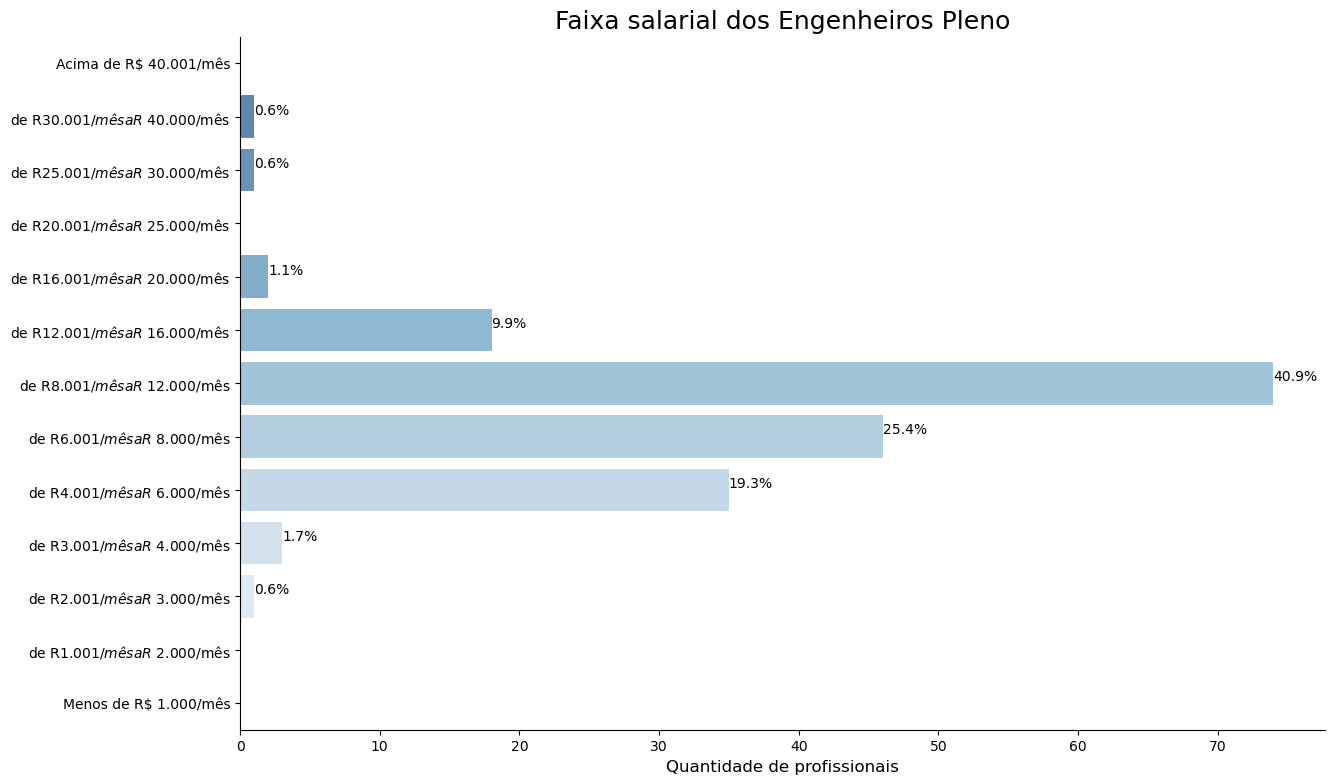

In [184]:
# Plotando gráfico de engenheiro pleno conforme faixa salarial


faixa_engenheiro_pleno = sns.countplot(y=dados_engenheiros[dados_engenheiros['Nivel']=='Pleno']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_engenheiro_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_engenheiro_pleno.set_ylabel('')
faixa_engenheiro_pleno.set_title('Faixa salarial dos Engenheiros Pleno', fontsize= 18)
faixa_engenheiro_pleno.figure.set_size_inches(14,9)
faixa_engenheiro_pleno.spines['top'].set_visible(False)
faixa_engenheiro_pleno.spines['right'].set_visible(False)


without_hue_h(faixa_engenheiro_pleno, dados_engenheiros[dados_engenheiros['Nivel']=='Pleno']['Faixa salarial'])

Cerca de 41% dos engenheiros pleno recebem de 8 a 12 mil reais mensais. O percentual de profissionais com salários superiores a 20 mil reais mensais é de 2,3 %.

conclusão: mais uma vez a menor faixa salarial é dos analistas (4 a 6 mil reais mensais)  e dos cientistas e engenheiros coincidem (8 a 12 mil reais mensais). No tocante a salários superiores a 20 mil reais, os cientistas possuem o dobro quando comparados aos engenheiros e estes o dobro em relação aos analistas (4.6, 2.3, 1.2%, respectivamente.

#### Sênior

##### Analistas

In [90]:
dados_analistas[dados_analistas['Nivel']=='Sênior']['Faixa salarial'].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     77
de R$ 12.001/mês a R$ 16.000/mês    38
de R$ 6.001/mês a R$ 8.000/mês      29
de R$ 16.001/mês a R$ 20.000/mês    10
de R$ 4.001/mês a R$ 6.000/mês       9
de R$ 30.001/mês a R$ 40.000/mês     5
de R$ 20.001/mês a R$ 25.000/mês     2
de R$ 3.001/mês a R$ 4.000/mês       1
de R$ 25.001/mês a R$ 30.000/mês     1
Acima de R$ 40.001/mês               1
de R$ 1.001/mês a R$ 2.000/mês       1
Name: Faixa salarial, dtype: int64

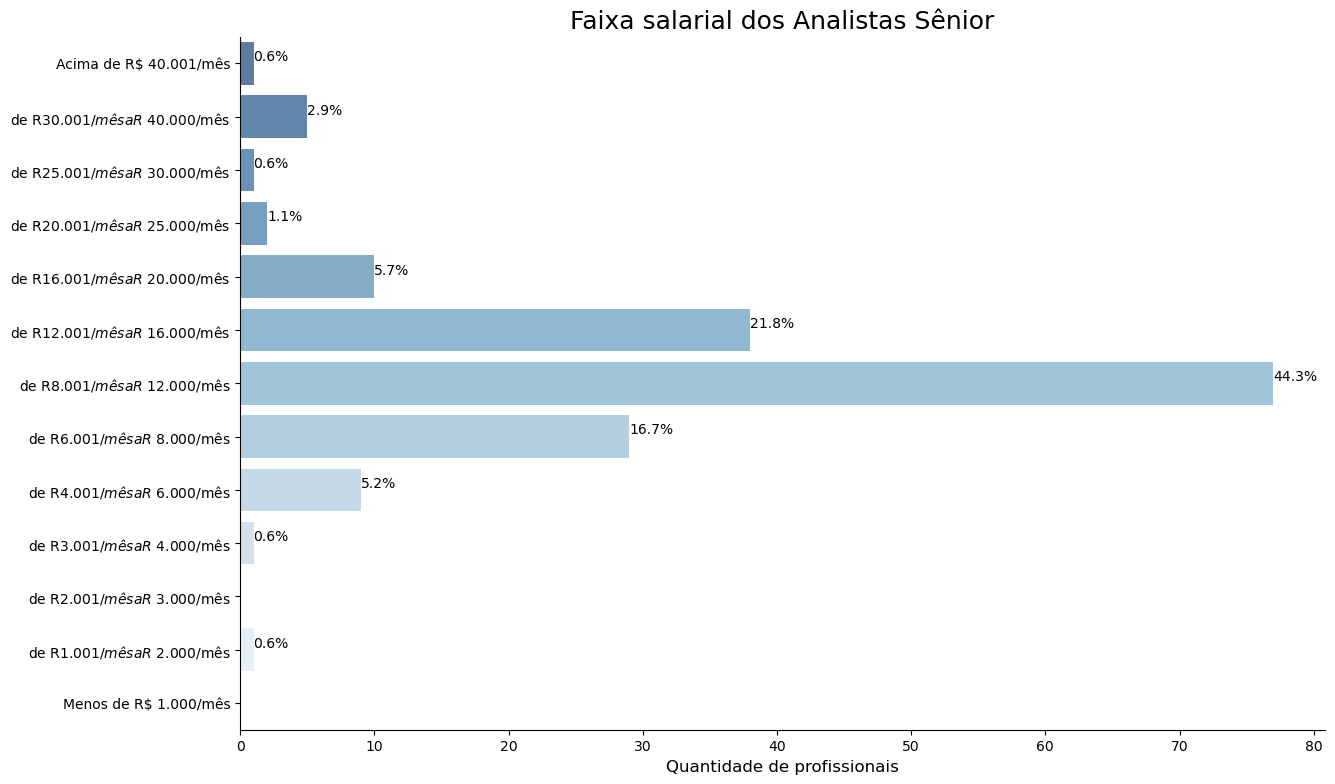

In [185]:
# Plotando gráfico de analistas sênior conforme faixa salarial

faixa_analista_sr = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Sênior']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_analista_sr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_analista_sr.set_ylabel('')
faixa_analista_sr.set_title('Faixa salarial dos Analistas Sênior', fontsize= 18)
faixa_analista_sr.figure.set_size_inches(14,9)
faixa_analista_sr.spines['top'].set_visible(False)
faixa_analista_sr.spines['right'].set_visible(False)

without_hue_h(faixa_analista_sr, dados_analistas[dados_analistas['Nivel']=='Sênior']['Faixa salarial'])

44 % dos analistas sênior recebem de 8 a 12 mil reais mensalmente. 5% recebem salários superiores a 20 mil reais.

##### Cientistas

In [92]:
dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Faixa salarial'].value_counts()

de R$ 12.001/mês a R$ 16.000/mês    69
de R$ 8.001/mês a R$ 12.000/mês     59
de R$ 16.001/mês a R$ 20.000/mês    25
de R$ 20.001/mês a R$ 25.000/mês     8
de R$ 30.001/mês a R$ 40.000/mês     8
de R$ 6.001/mês a R$ 8.000/mês       4
de R$ 4.001/mês a R$ 6.000/mês       3
de R$ 25.001/mês a R$ 30.000/mês     2
Acima de R$ 40.001/mês               2
Name: Faixa salarial, dtype: int64

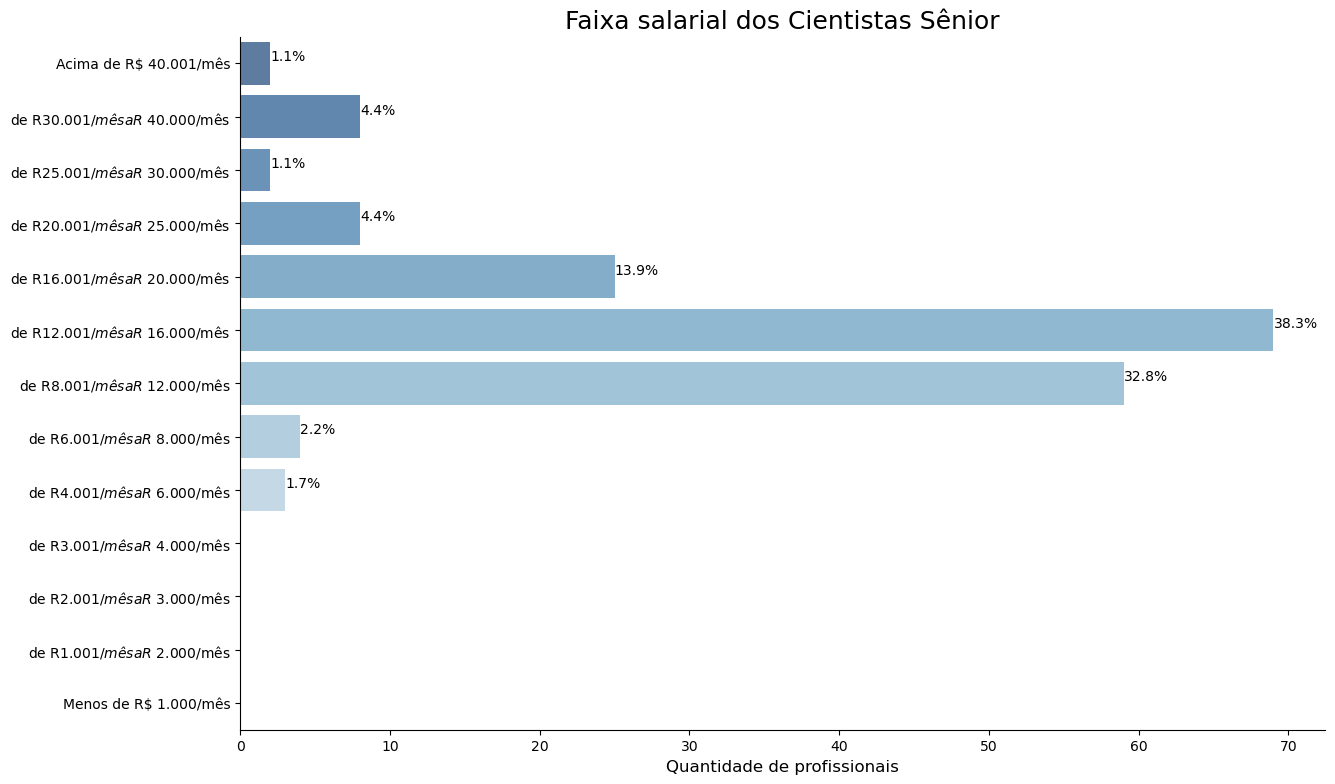

In [186]:
# Plotando gráfico de cientistas sênior conforme faixa salarial


faixa_cientista_sr = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_cientista_sr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_cientista_sr.set_ylabel('')
faixa_cientista_sr.set_title('Faixa salarial dos Cientistas Sênior', fontsize= 18)
faixa_cientista_sr.figure.set_size_inches(14,9)
faixa_cientista_sr.spines['top'].set_visible(False)
faixa_cientista_sr.spines['right'].set_visible(False)


without_hue_h(faixa_cientista_sr, dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Faixa salarial'])


38% dos cientistas pleno recebem entre 12 e 16 mil reais mensais. 11% recebem salários superiores a 20 mil reais mensais (mais que o dobro de profissionais quando comparado aos analistas senior)

##### Engenheiros

In [94]:
dados_engenheiros[dados_engenheiros['Nivel']=='Sênior']['Faixa salarial'].value_counts()

de R$ 12.001/mês a R$ 16.000/mês    72
de R$ 8.001/mês a R$ 12.000/mês     53
de R$ 16.001/mês a R$ 20.000/mês    19
de R$ 20.001/mês a R$ 25.000/mês    11
Acima de R$ 40.001/mês               6
de R$ 25.001/mês a R$ 30.000/mês     6
de R$ 30.001/mês a R$ 40.000/mês     4
de R$ 6.001/mês a R$ 8.000/mês       3
de R$ 4.001/mês a R$ 6.000/mês       2
de R$ 3.001/mês a R$ 4.000/mês       1
Name: Faixa salarial, dtype: int64

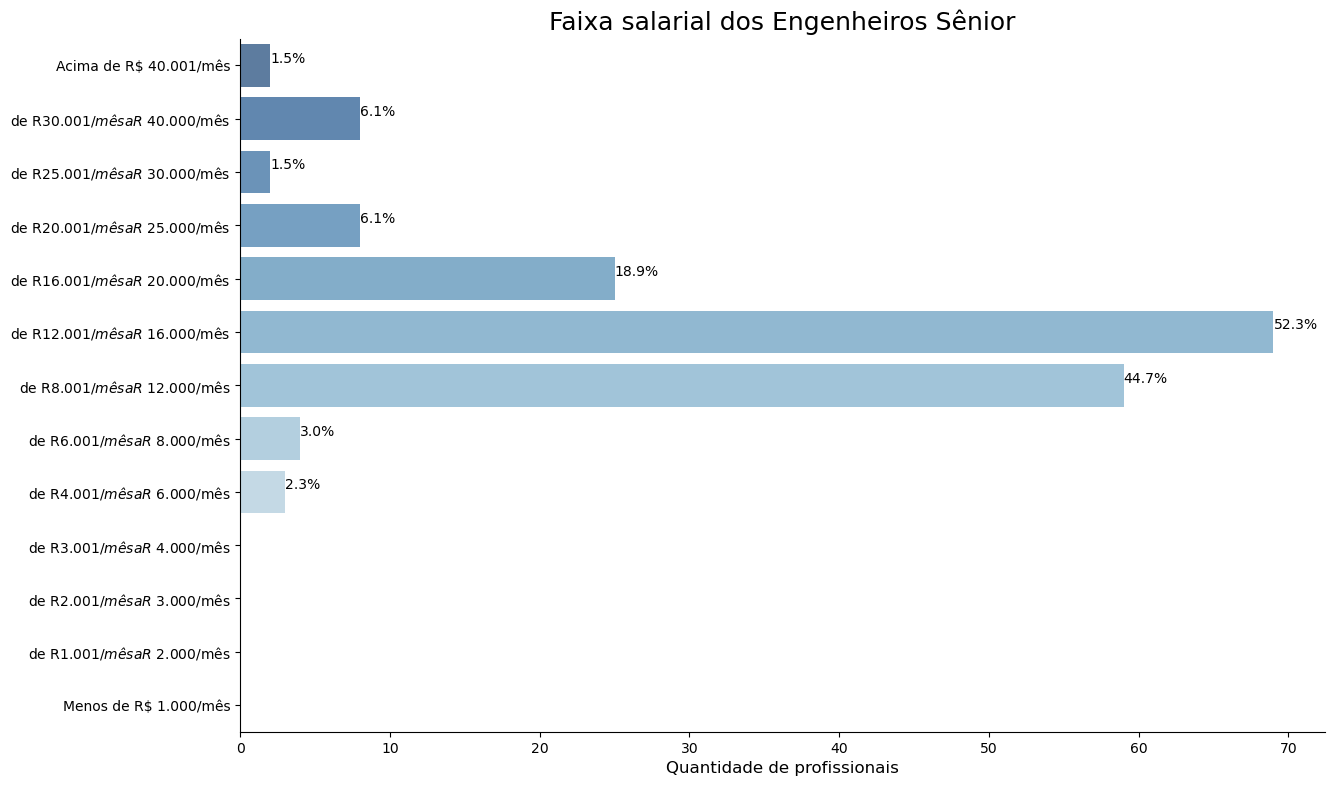

In [187]:
# Plotando gráfico de engenheiros senior conforme faixa salarial

faixa_engenheiro_sr = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Faixa salarial'], palette='Blues_r', alpha=0.7)
faixa_engenheiro_sr.set_xlabel('Quantidade de profissionais', fontsize=12)
faixa_engenheiro_sr.set_ylabel('')
faixa_engenheiro_sr.set_title('Faixa salarial dos Engenheiros Sênior', fontsize= 18)
faixa_engenheiro_sr.figure.set_size_inches(14,9)
faixa_engenheiro_sr.spines['top'].set_visible(False)
faixa_engenheiro_sr.spines['right'].set_visible(False)

without_hue_h(faixa_engenheiro_sr, dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Faixa salarial'])

52% dos engenheiros recebem de 12 a 16 mil reais mensais. A segunda faixa com grande presença é a de 8 a 12 que contempla quase 45% dos profissionais. Mais de 15% recebem mais de 20 mil reais por mês. (4% a mais que cientistas e 10% a mais que analistas)

conclusão: os analistas novamente aparecem com a menor faixa salarial (8 a 12mil reais mensais), ja cientistas e engenheiros coincidem novamente na mesma faixa salarial (12 a 16mil), no entanto com percentuais bem diferentes (38 e 52% respectivamente), ou seja, há menos homogeneidade na distribuição das faixas. 
E dessa vez são os engenheiros que aparecem na frente no tocante à salarios superiores a 20 mil reais mensais (15%), seguidos de cientistas (11%) e analistas (4%), respectivamente.


### Nível de ensino

#### Júnior

##### Analistas

In [96]:
# Aqui ta geral de todos os niveis.

dados_analistas.groupby(['Cargo Atual', 'Nivel de Ensino'])['Nivel de Ensino'].count().sort_values(ascending=False)

Cargo Atual                     Nivel de Ensino           
Analista de Dados/Data Analyst  Graduação/Bacharelado         267
                                Pós-graduação                 200
                                Estudante de Graduação        108
                                Mestrado                       44
                                Não tenho graduação formal     10
                                Doutorado ou Phd                9
                                Prefiro não informar            1
Name: Nivel de Ensino, dtype: int64

In [97]:
# Verificando se a variável é categórica. Caso negativo, realizar conversão

dados_analistas['Nivel de Ensino'].unique()

array(['Graduação/Bacharelado', 'Estudante de Graduação', 'Pós-graduação',
       'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [98]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.

ensino_analistas_cat_type = pd.CategoricalDtype(categories=['Doutorado ou Phd',
                                                        'Mestrado',
                                                        'Pós-graduação',
                                                        'Graduação/Bacharelado',
                                                        'Estudante de Graduação',
                                                        'Não tenho graduação formal',
                                                        'Prefiro não informar'
                                                        ], ordered=True)
dados_analistas['Nivel de Ensino'] = dados_analistas['Nivel de Ensino'].astype(ensino_analistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico

C:\Users\maari\AppData\Local\Temp\ipykernel_12976\2020090145.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_analistas['Nivel de Ensino'] = dados_analistas['Nivel de Ensino'].astype(ensino_analistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [99]:
dados_analistas['Nivel de Ensino'].unique()

['Graduação/Bacharelado', 'Estudante de Graduação', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal', 'Prefiro não informar']
Categories (7, object): ['Doutorado ou Phd' < 'Mestrado' < 'Pós-graduação' < 'Graduação/Bacharelado' < 'Estudante de Graduação' < 'Não tenho graduação formal' < 'Prefiro não informar']

In [100]:
dados_analistas[dados_analistas['Nivel']=='Júnior']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         102
Estudante de Graduação         74
Pós-graduação                  35
Mestrado                       11
Não tenho graduação formal      5
Doutorado ou Phd                1
Prefiro não informar            1
Name: Nivel de Ensino, dtype: int64

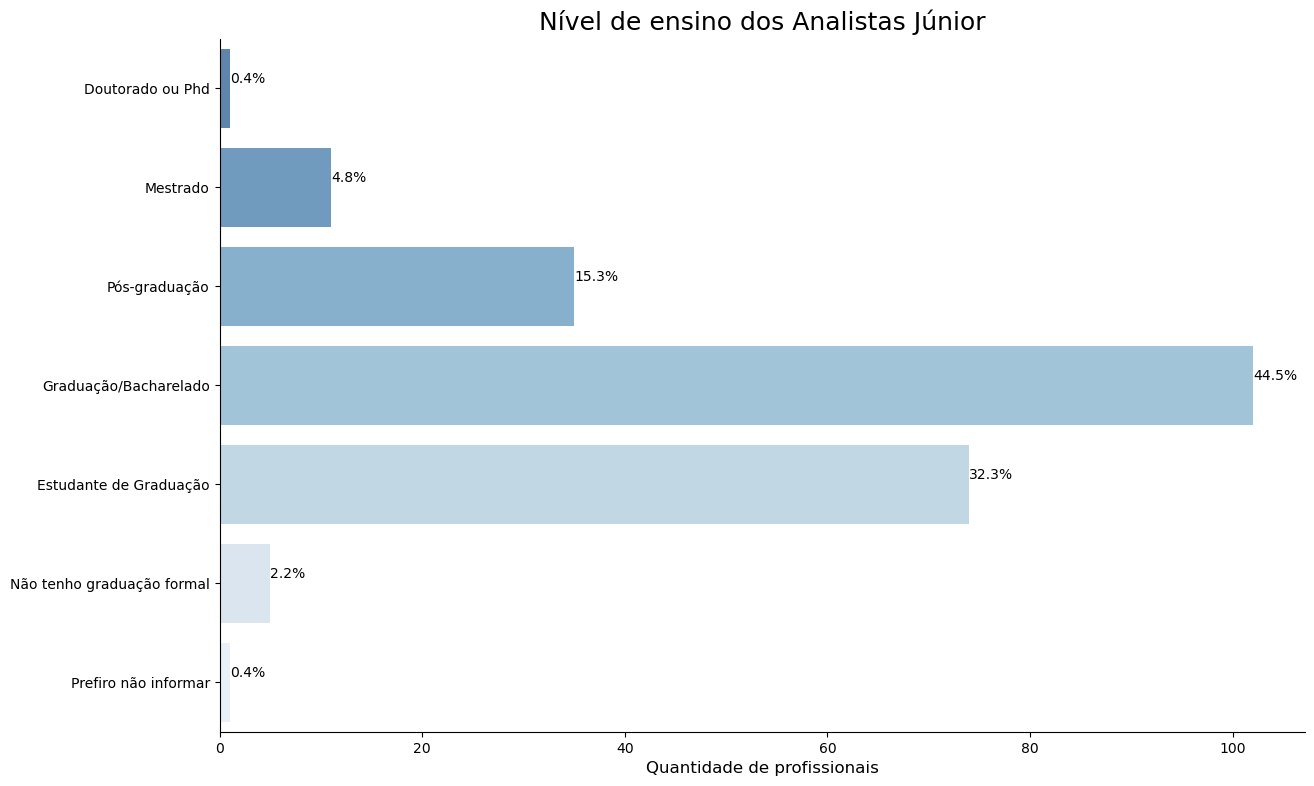

In [101]:
# Plotando gráfico do nivel de ensino dos analistas junior

ensino_analista_jr = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Júnior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_analista_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_analista_jr.set_ylabel('')
ensino_analista_jr.set_title('Nível de ensino dos Analistas Júnior', fontsize= 18)
ensino_analista_jr.figure.set_size_inches(14,9)
ensino_analista_jr.spines['top'].set_visible(False)
ensino_analista_jr.spines['right'].set_visible(False)

without_hue_h(ensino_analista_jr, dados_analistas[dados_analistas['Nivel']=='Júnior']['Nivel de Ensino'])

44 % dos analistas junior possui graduação e 32 % são estudantes de gradução, totalizando quase 77% do nivel de ensino desses profissionais. Ao analisar mestrado e doutorado/phd, o percentual é de 4,8 e 0,4 %, respectivamente.

##### Cientistas

In [102]:

dados_cientistas.groupby(['Cargo Atual', 'Nivel de Ensino'])['Nivel de Ensino'].count().sort_values(ascending=False)

Cargo Atual                        Nivel de Ensino           
Cientista de Dados/Data Scientist  Graduação/Bacharelado         188
                                   Mestrado                      124
                                   Pós-graduação                 113
                                   Doutorado ou Phd               68
                                   Estudante de Graduação         60
                                   Não tenho graduação formal      3
Name: Nivel de Ensino, dtype: int64

In [103]:
# Verificando se a variável é categórica. Caso negativo, realizar conversão

dados_cientistas['Nivel de Ensino'].unique()

array(['Doutorado ou Phd', 'Graduação/Bacharelado', 'Pós-graduação',
       'Mestrado', 'Estudante de Graduação', 'Não tenho graduação formal'],
      dtype=object)

In [104]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.

ensino_cientistas_cat_type = pd.CategoricalDtype(categories=['Doutorado ou Phd',
                                                        'Mestrado',
                                                        'Pós-graduação',
                                                        'Graduação/Bacharelado',
                                                        'Estudante de Graduação',
                                                        'Não tenho graduação formal',
                                                        'Prefiro não informar'
                                                        ], ordered=True)
dados_cientistas['Nivel de Ensino'] = dados_cientistas['Nivel de Ensino'].astype(ensino_cientistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico

C:\Users\maari\AppData\Local\Temp\ipykernel_12976\1930826886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cientistas['Nivel de Ensino'] = dados_cientistas['Nivel de Ensino'].astype(ensino_cientistas_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [105]:
# Confirmando conversão

dados_cientistas['Nivel de Ensino'].unique()

['Doutorado ou Phd', 'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Estudante de Graduação', 'Não tenho graduação formal']
Categories (7, object): ['Doutorado ou Phd' < 'Mestrado' < 'Pós-graduação' < 'Graduação/Bacharelado' < 'Estudante de Graduação' < 'Não tenho graduação formal' < 'Prefiro não informar']

In [106]:
dados_cientistas[dados_cientistas['Nivel']=='Júnior']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         82
Estudante de Graduação        49
Mestrado                      22
Pós-graduação                 21
Doutorado ou Phd              10
Não tenho graduação formal     1
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

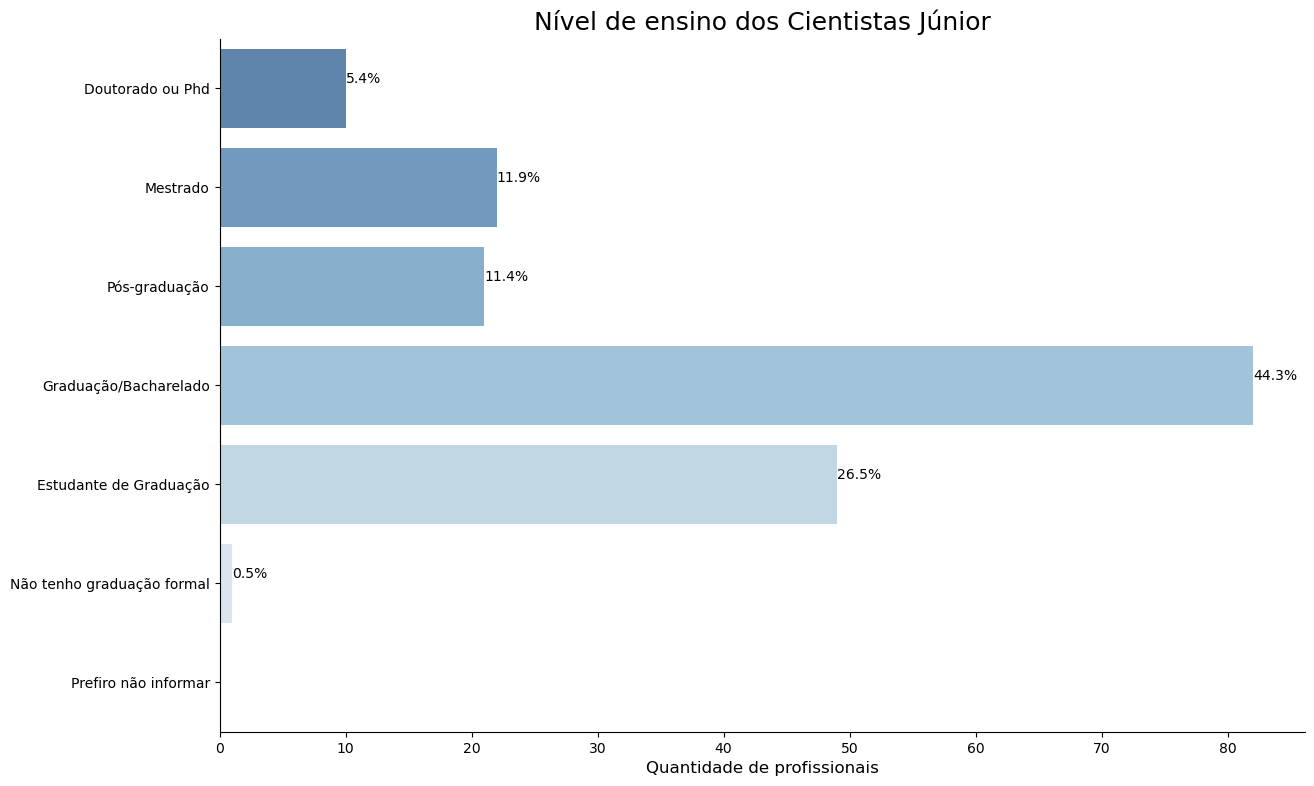

In [107]:
# Plotando gráfico do nivel de ensino dos cientistas junior

ensino_cientista_jr = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Júnior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_cientista_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_cientista_jr.set_ylabel('')
ensino_cientista_jr.set_title('Nível de ensino dos Cientistas Júnior', fontsize= 18)
ensino_cientista_jr.figure.set_size_inches(14,9)
ensino_cientista_jr.spines['top'].set_visible(False)
ensino_cientista_jr.spines['right'].set_visible(False)

without_hue_h(ensino_cientista_jr, dados_cientistas[dados_cientistas['Nivel']=='Júnior'])

Assim como os analistas, cerca de 44% dos cientistas possuem graduação. No entanto, ao analisar os percentuais de mestrado e doutorado/phd, estes somam mais de 17%, quase o triplo do observado nos analistas.

##### Engenheiros

In [108]:
dados_engenheiros.groupby(['Cargo Atual', 'Nivel de Ensino'])['Nivel de Ensino'].count().sort_values(ascending=False)

Cargo Atual                                                          Nivel de Ensino           
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect  Graduação/Bacharelado         201
                                                                     Pós-graduação                 167
                                                                     Estudante de Graduação         65
                                                                     Mestrado                       43
                                                                     Não tenho graduação formal     10
                                                                     Doutorado ou Phd                3
                                                                     Prefiro não informar            1
Name: Nivel de Ensino, dtype: int64

In [109]:
dados_engenheiros['Nivel de Ensino'].unique()

array(['Graduação/Bacharelado', 'Pós-graduação', 'Estudante de Graduação',
       'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [110]:
# Organizando meus dados categóricos na ordem que desejo, que é no sentido decrescente pois é melhor vizualizada nos graficos.

ensino_engenheiros_cat_type = pd.CategoricalDtype(categories=['Doutorado ou Phd',
                                                        'Mestrado',
                                                        'Pós-graduação',
                                                        'Graduação/Bacharelado',
                                                        'Estudante de Graduação',
                                                        'Não tenho graduação formal',
                                                        'Prefiro não informar'
                                                        ], ordered=True)
dados_engenheiros['Nivel de Ensino'] = dados_engenheiros['Nivel de Ensino'].astype(ensino_engenheiros_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico

C:\Users\maari\AppData\Local\Temp\ipykernel_12976\3687871530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_engenheiros['Nivel de Ensino'] = dados_engenheiros['Nivel de Ensino'].astype(ensino_engenheiros_cat_type) # convertendo a minha coluna do tipo object para o tipo categórico


In [111]:
dados_engenheiros['Nivel de Ensino'].unique()

['Graduação/Bacharelado', 'Pós-graduação', 'Estudante de Graduação', 'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal', 'Prefiro não informar']
Categories (7, object): ['Doutorado ou Phd' < 'Mestrado' < 'Pós-graduação' < 'Graduação/Bacharelado' < 'Estudante de Graduação' < 'Não tenho graduação formal' < 'Prefiro não informar']

In [112]:
dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         56
Estudante de Graduação        36
Pós-graduação                 26
Mestrado                      10
Não tenho graduação formal     2
Doutorado ou Phd               1
Prefiro não informar           1
Name: Nivel de Ensino, dtype: int64

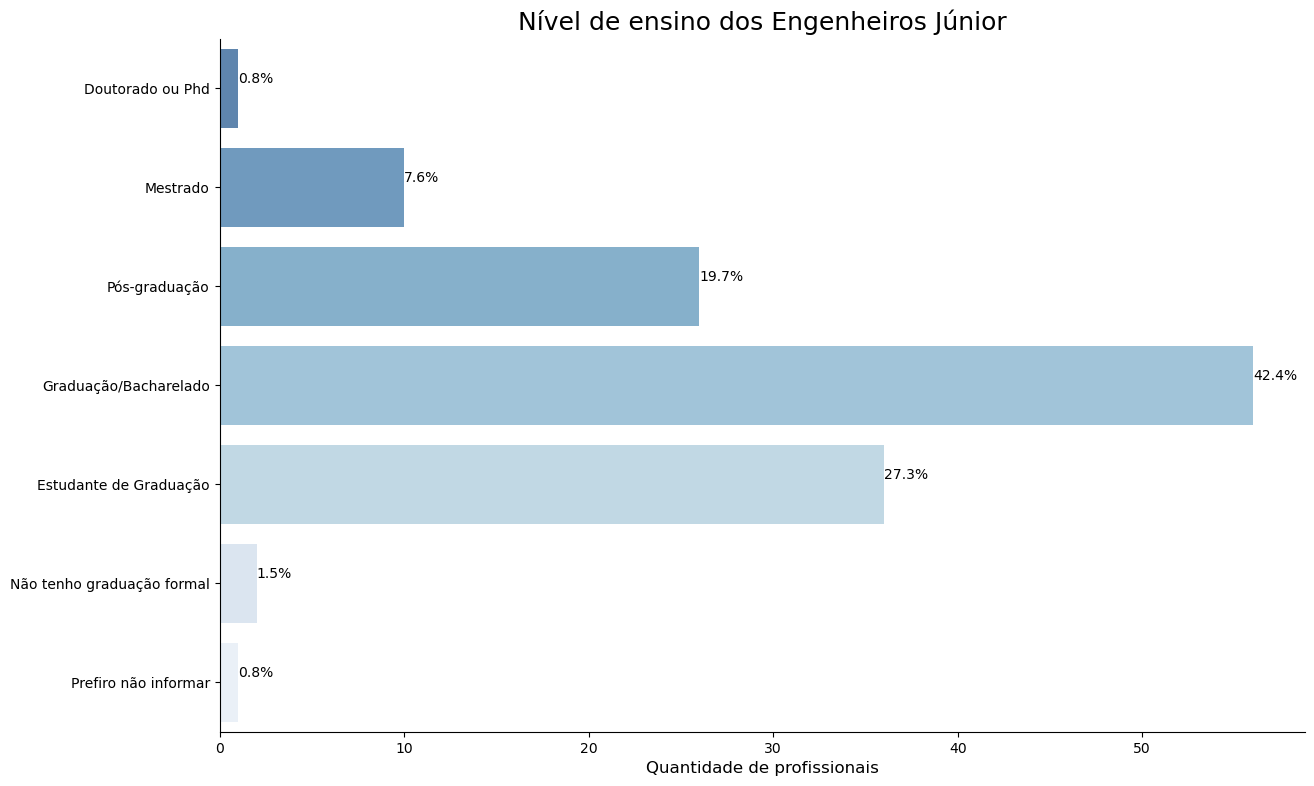

In [113]:
# Plotando gráfico do nivel de ensino dos engenheiros junior


ensino_engenheiro_jr = sns.countplot(y=dados_engenheiros[dados_engenheiros['Nivel']=='Júnior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_engenheiro_jr.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_engenheiro_jr.set_ylabel('')
ensino_engenheiro_jr.set_title('Nível de ensino dos Engenheiros Júnior', fontsize= 18)
ensino_engenheiro_jr.figure.set_size_inches(14,9)
ensino_engenheiro_jr.spines['top'].set_visible(False)
ensino_engenheiro_jr.spines['right'].set_visible(False)


without_hue_h(ensino_engenheiro_jr, dados_engenheiros[dados_engenheiros['Nivel']=='Júnior'])


Novamente o nível de ensino com maior representação é o de graduação, com percentual de 42 %, muito semelhantes aos demais profissionais supranalisados. O percentual de profissionais com mestrado e/ou doutorado/phd é de 8,4% (menor que dos cientistas). Vale destacar que é o cargo com percentual de pós graduados mais significativo, , quase 20%.


conclusão: o nível de ensino predominante entre os profissionais júnior é a graduação, o percentual é bem semelhantes entre os três cargos analisados. Ao observar o percentual de mestres e doutores, o percentual de cientistas é bem expressivo (17%) quando comparado a engenheiros (8%) e analistas (5%)


#### Pleno

##### Analistas

In [114]:
dados_analistas[dados_analistas['Nivel']=='Pleno']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         103
Pós-graduação                  82
Estudante de Graduação         25
Mestrado                       15
Doutorado ou Phd                6
Não tenho graduação formal      5
Prefiro não informar            0
Name: Nivel de Ensino, dtype: int64

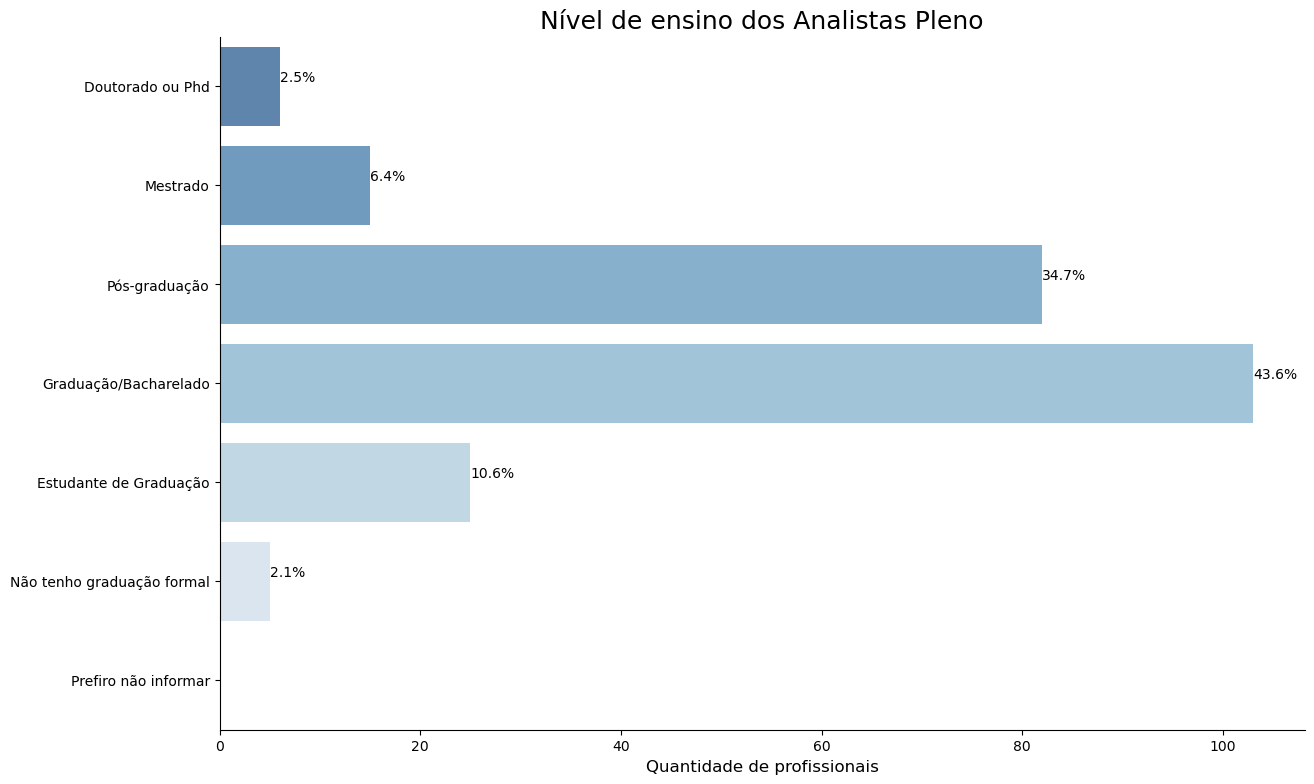

In [115]:
# Plotando gráfico do nivel de ensino dos analistas pleno

ensino_analista_pleno = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Pleno']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_analista_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_analista_pleno.set_ylabel('')
ensino_analista_pleno.set_title('Nível de ensino dos Analistas Pleno', fontsize= 18)
ensino_analista_pleno.figure.set_size_inches(14,9)
ensino_analista_pleno.spines['top'].set_visible(False)
ensino_analista_pleno.spines['right'].set_visible(False)

without_hue_h(ensino_analista_pleno, dados_analistas[dados_analistas['Nivel']=='Pleno']['Nivel de Ensino'])

O percentual de analistas pleno com graduação é muito próximo dos analistas júnior com cerca de 44%, no entanto observa-se um crescimento no percentual de pessoas com mestrado e doutorado/phd para 8,9% (antes o somatório era de 5.2 %). 

##### Cientistas

In [116]:
dados_cientistas[dados_cientistas['Nivel']=='Pleno']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         61
Mestrado                      54
Pós-graduação                 48
Doutorado ou Phd              18
Estudante de Graduação         9
Não tenho graduação formal     1
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

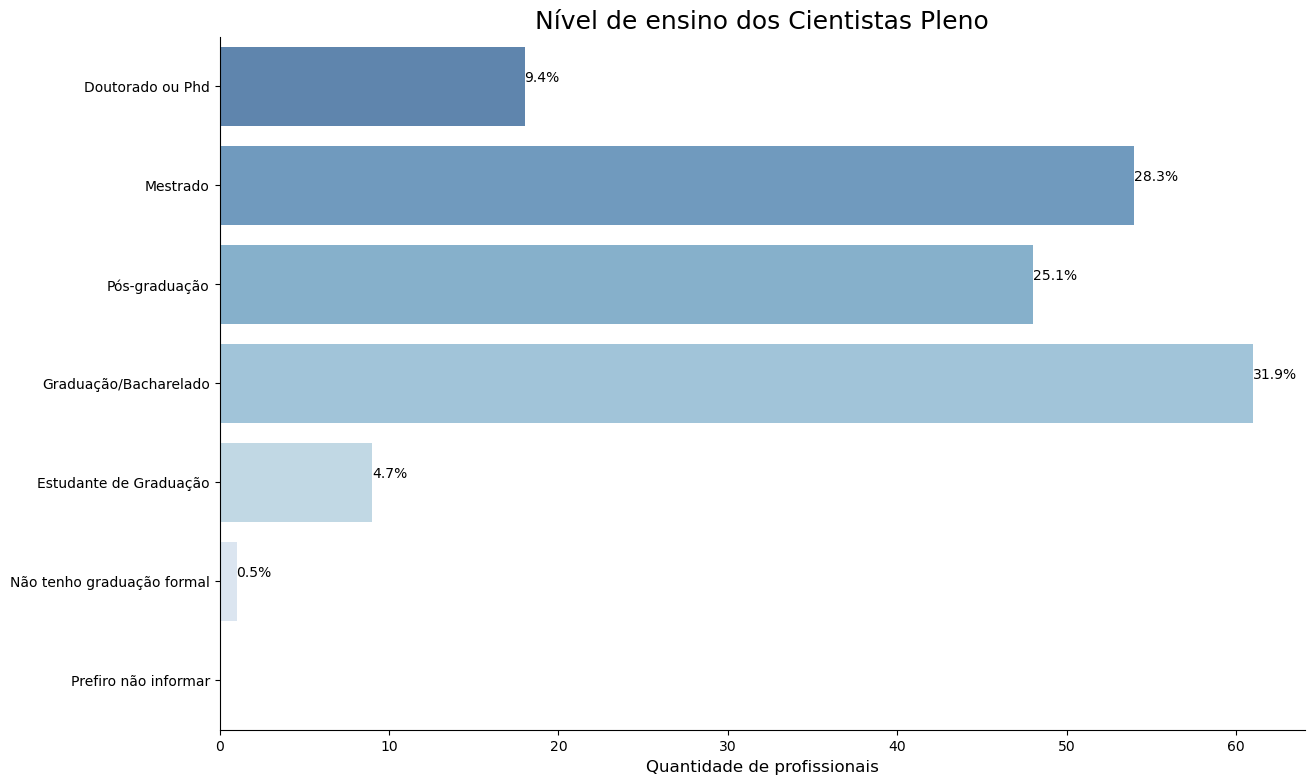

In [117]:
# Plotando gráfico do nivel de ensino dos cientistas pleno

ensino_cientista_pleno = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Pleno']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_cientista_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_cientista_pleno.set_ylabel('')
ensino_cientista_pleno.set_title('Nível de ensino dos Cientistas Pleno', fontsize= 18)
ensino_cientista_pleno.figure.set_size_inches(14,9)
ensino_cientista_pleno.spines['top'].set_visible(False)
ensino_cientista_pleno.spines['right'].set_visible(False)

without_hue_h(ensino_cientista_pleno, dados_cientistas[dados_cientistas['Nivel']=='Pleno'])

O nivel de ensino mais representativo entre os cientistas pleno se mantém sendo a graduação (32%), no entanto vale destacar que logo atrás com 28% são os profissionais com mestrado. 

##### Engenheiros

In [118]:
dados_engenheiros[dados_engenheiros['Nivel']=='Pleno']['Nivel de Ensino'].value_counts()

Graduação/Bacharelado         77
Pós-graduação                 55
Mestrado                      21
Estudante de Graduação        20
Não tenho graduação formal     7
Doutorado ou Phd               1
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

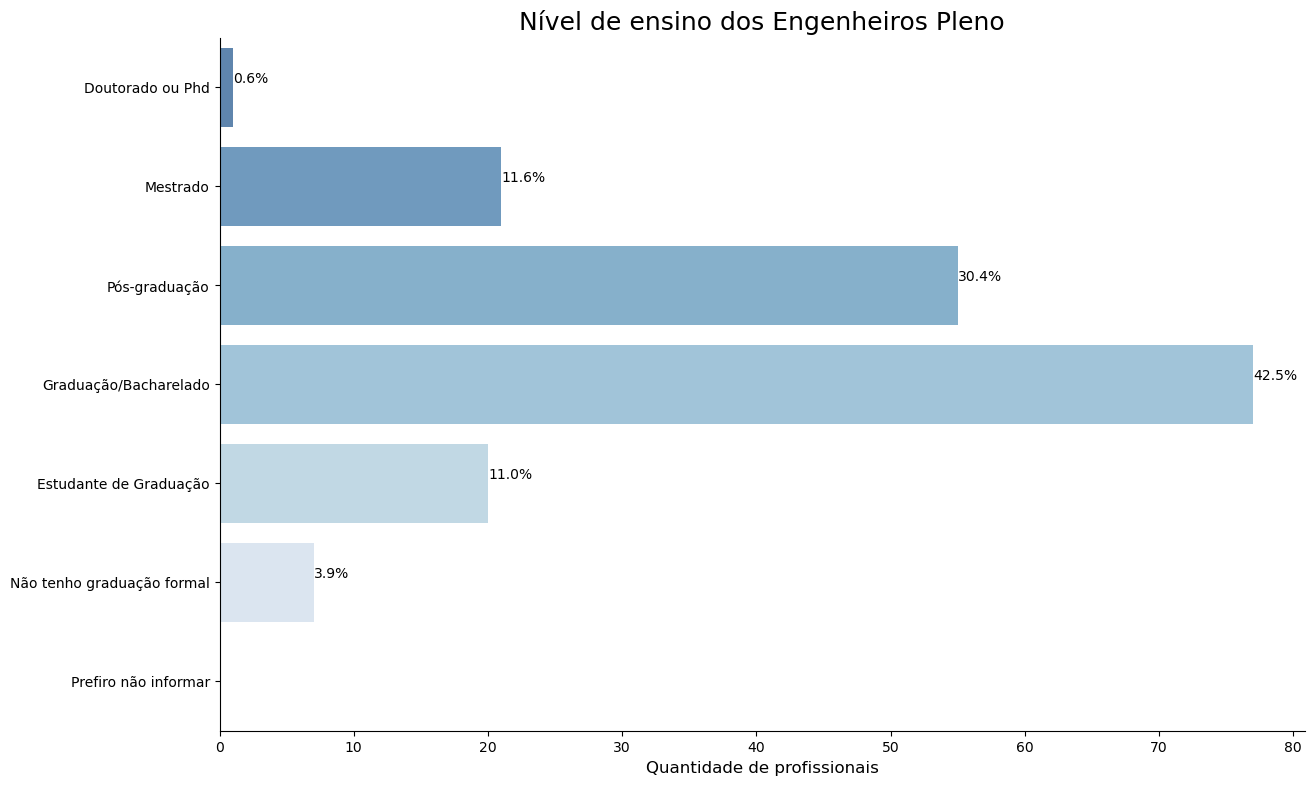

In [119]:
# Plotando gráfico do nivel de ensino dos engenheiros pleno


ensino_engenheiro_pleno = sns.countplot(y=dados_engenheiros[dados_engenheiros['Nivel']=='Pleno']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_engenheiro_pleno.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_engenheiro_pleno.set_ylabel('')
ensino_engenheiro_pleno.set_title('Nível de ensino dos Engenheiros Pleno', fontsize= 18)
ensino_engenheiro_pleno.figure.set_size_inches(14,9)
ensino_engenheiro_pleno.spines['top'].set_visible(False)
ensino_engenheiro_pleno.spines['right'].set_visible(False)


without_hue_h(ensino_engenheiro_pleno, dados_engenheiros[dados_engenheiros['Nivel']=='Pleno'])

A graduação continua sendo o nivel de ensino mais representativo dos engenheiros pleno com cerca de 43%. O percentual de estudantes de graduação reduz quase 20% e os pós graduados cresce 10% (quando comparado aos engnheiros junior).

conclusão: a graduação continua sendo o nivel de ensino mais representativos entre os profissionais de nivel pleno, todavia ha um aumento em outros níveis como pós graduação, mestrado e doutorado/phd. O numero analistas e engenheiros mestres e/ou doutores/phd cresce significativamente enquanto que o de cientistas mais que dobra.

#### Sênior

##### Analistas

In [120]:
dados_analistas[dados_analistas['Nivel']=='Sênior']['Nivel de Ensino'].value_counts()

Pós-graduação                 83
Graduação/Bacharelado         62
Mestrado                      18
Estudante de Graduação         9
Doutorado ou Phd               2
Não tenho graduação formal     0
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

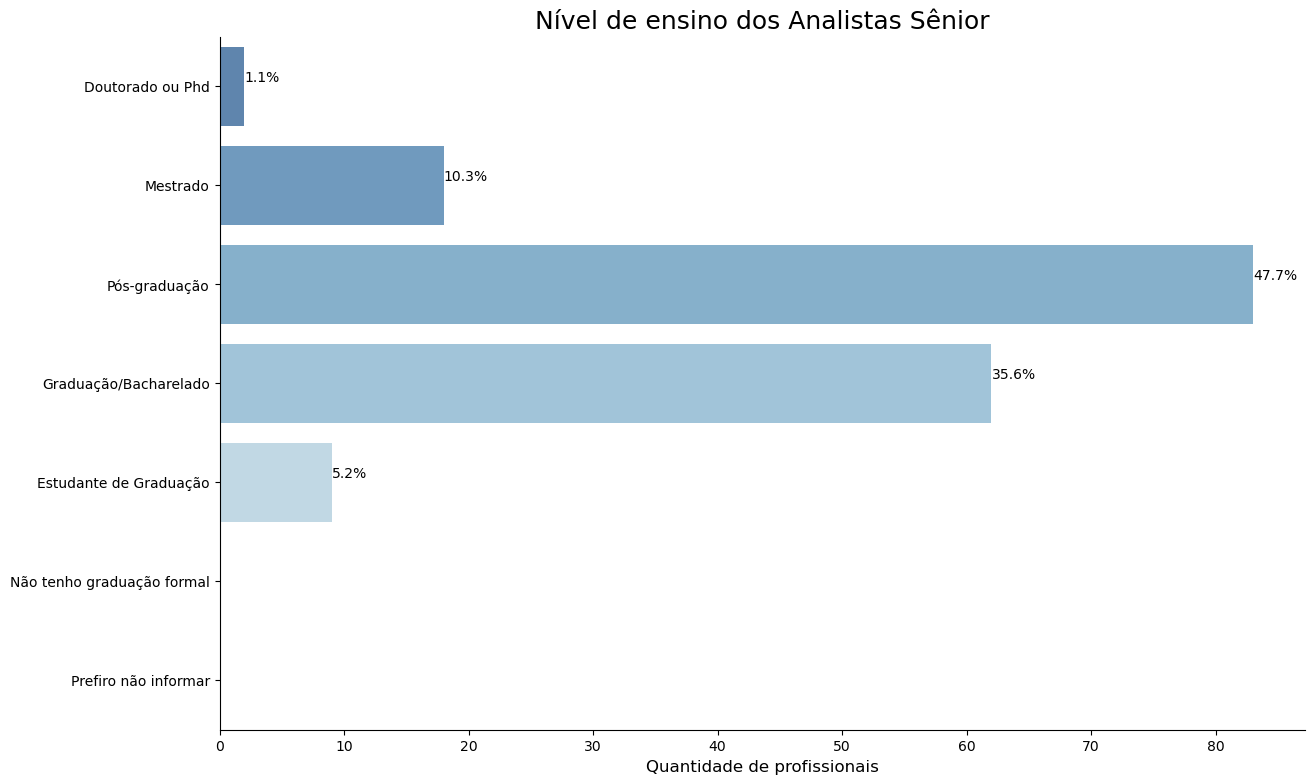

In [121]:
# Plotando gráfico do nivel de ensino dos analistas sênior

ensino_analista_senior = sns.countplot(y=dados_analistas[dados_analistas['Nivel']=='Sênior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_analista_senior.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_analista_senior.set_ylabel('')
ensino_analista_senior.set_title('Nível de ensino dos Analistas Sênior', fontsize= 18)
ensino_analista_senior.figure.set_size_inches(14,9)
ensino_analista_senior.spines['top'].set_visible(False)
ensino_analista_senior.spines['right'].set_visible(False)

without_hue_h(ensino_analista_senior, dados_analistas[dados_analistas['Nivel']=='Sênior']['Nivel de Ensino'])

O nivel de ensino mais representativo entre o analistas senior é a pós graduação com quase 48 %. O percentual de profissionais com mestrado e doutorado/phd tem um acréscimo, passando de 8,9 para 11,4 %. O percentual de profissionais estudantes de graduação cai pela metadade, sendo agora de 5 %. ((todas as comparações são feitas com os analistas pleno)

##### Cientistas

In [122]:
dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Nivel de Ensino'].value_counts()

Mestrado                      48
Graduação/Bacharelado         45
Pós-graduação                 44
Doutorado ou Phd              40
Estudante de Graduação         2
Não tenho graduação formal     1
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

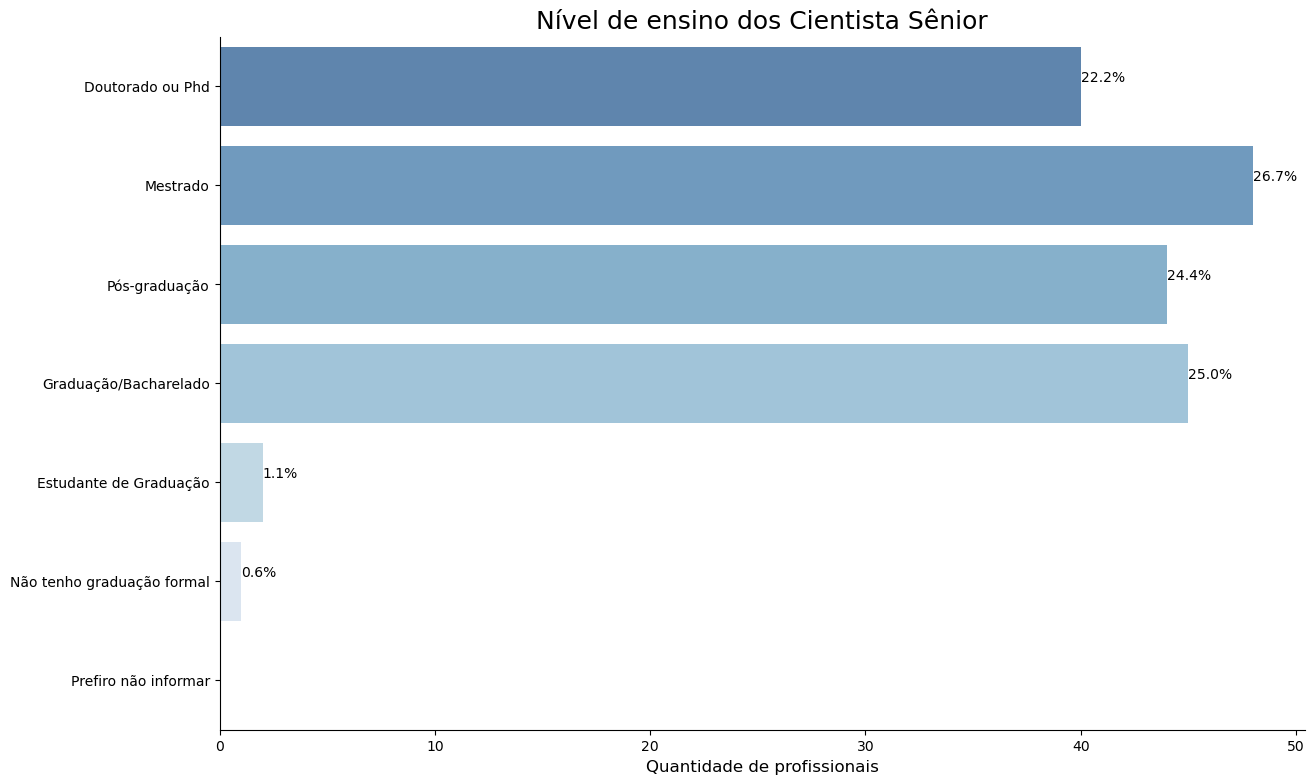

In [123]:
# Plotando gráfico do nivel de ensino dos cientistas junior

ensino_cientista_sr = sns.countplot(y=dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_cientista_sr.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_cientista_sr.set_ylabel('')
ensino_cientista_sr.set_title('Nível de ensino dos Cientista Sênior', fontsize= 18)
ensino_cientista_sr.figure.set_size_inches(14,9)
ensino_cientista_sr.spines['top'].set_visible(False)
ensino_cientista_sr.spines['right'].set_visible(False)

without_hue_h(ensino_cientista_sr, dados_cientistas[dados_cientistas['Nivel']=='Sênior']['Nivel de Ensino'])

Muito interessante o nivel de ensino dos cientistas pleno! Quase 27% deles possuem mestrado, seguidos por 25% de  graduados, 24% de pós graduados e 22% de doutores/phd. O nível de estudantes de graduação é infímo, apenas 1%.

##### Engenheiros

In [124]:
dados_engenheiros[dados_engenheiros['Nivel']=='Sênior']['Nivel de Ensino'].value_counts()

Pós-graduação                 86
Graduação/Bacharelado         68
Mestrado                      12
Estudante de Graduação         9
Doutorado ou Phd               1
Não tenho graduação formal     1
Prefiro não informar           0
Name: Nivel de Ensino, dtype: int64

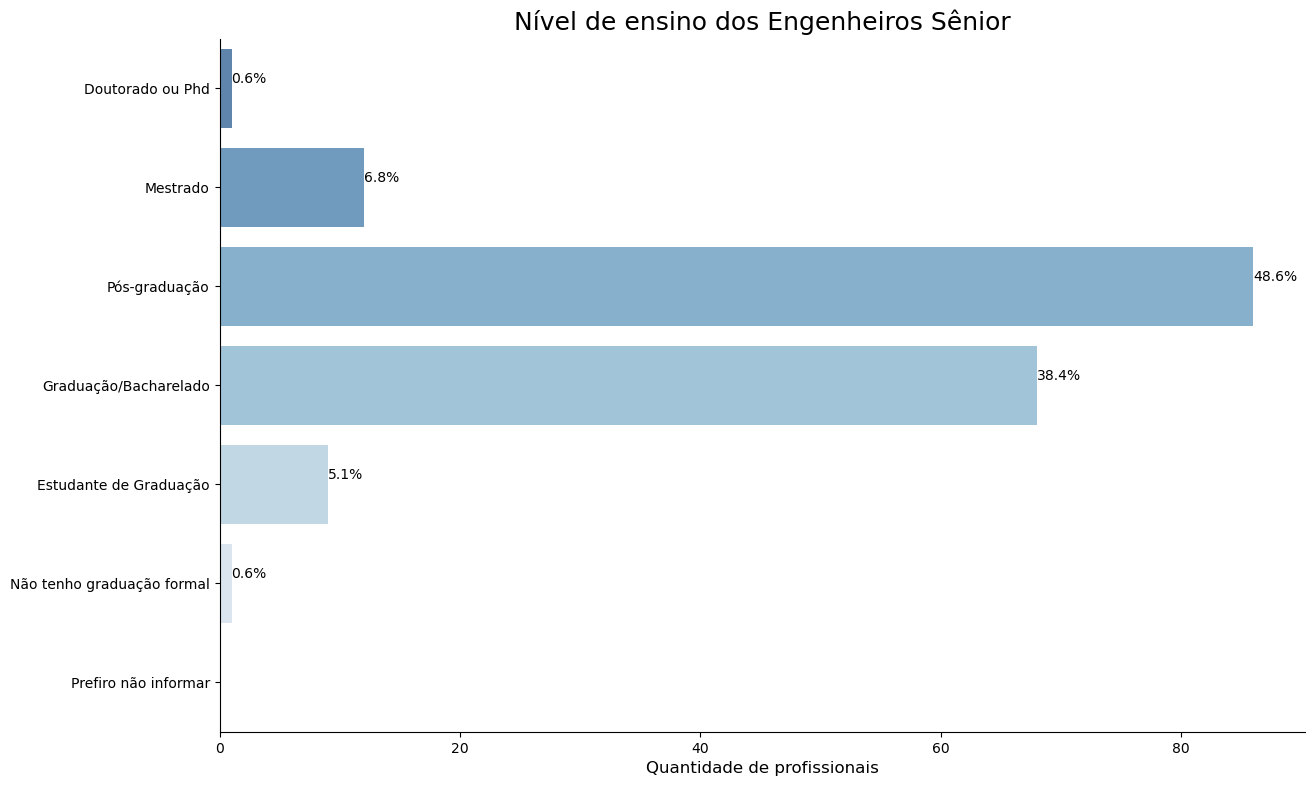

In [125]:
# Plotando gráfico do nivel de ensino dos engenheiros sênior


ensino_engenheiro_sr = sns.countplot(y=dados_engenheiros[dados_engenheiros['Nivel']=='Sênior']['Nivel de Ensino'], palette='Blues_r', alpha=0.7)
ensino_engenheiro_sr.set_xlabel('Quantidade de profissionais', fontsize=12)
ensino_engenheiro_sr.set_ylabel('')
ensino_engenheiro_sr.set_title('Nível de ensino dos Engenheiros Sênior', fontsize= 18)
ensino_engenheiro_sr.figure.set_size_inches(14,9)
ensino_engenheiro_sr.spines['top'].set_visible(False)
ensino_engenheiro_sr.spines['right'].set_visible(False)


without_hue_h(ensino_engenheiro_sr, dados_engenheiros[dados_engenheiros['Nivel']=='Sênior'])

Quase metade dos engenheiros sênior são pós graduados com 49%. Curiosamente, o número de doutores/phd se mantém em 0,6% e há um decréscimo de quase 5% nos mestres (quando comparados ao engenheiros pleno)

conclusão: o nível de ensino predominante entre analistas e engenheiros é a pós graduação, enquanto que para os cientistas é mestrado. Quando somado os doutores/phd, chega ao impressioante percentual de 49%. O nivel de mestres e doutores entre os analistas cresce de forma mais tímida enquanto ha um decrescimo entre os engenheiros (ambas s comparações feitas em realação ao nivel pleno.

### Linguagens mais utilizadas

In [126]:
# Reorganizando meus dados para gerar novo dataframe e, então, plotar gráfico para melhor visualização.


linguagens = ['SQL', 'R ', 'Python', 'C/C++/C#', '.NET', 'Java', 'Julia', 'SAS/Stata', 'Visual Basic/VBA', 'Scala', 'Matlab', 'Javascript', 'Não utilizo nenhuma linguagem']
cargos= ['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist', 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']
lista_contagem = [] 
lista_linguagem = []
lista_cargo = []

for cargo in cargos:
    dados[(dados['Cargo Atual']==cargo)]
    # print(cargo)
    for linguagem in linguagens:
        dados[(dados[linguagem]==1)]
        # print(linguagem)
        lista_contagem.append(dados[(dados['Cargo Atual']==cargo) & (dados[linguagem]==1)].shape[0]) # COSNEGUI A QUANTIDADE.PRECISO CONVERTER EM %?
        lista_cargo.append(cargo)
        lista_linguagem.append(linguagem)

        
print(f'lista cargos = {lista_cargo}')  
print(f'lista linguagem = {lista_linguagem}') 
print(f'lista contagem = {lista_contagem}')    

lista cargos = ['Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Cientista de Dados/Data Scientist', 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Ar

In [127]:
# criando um DF a partir das listas acima obtidas

df_heatmap = pd.DataFrame(list(zip(lista_cargo, lista_linguagem, lista_contagem)),
                          columns=['Cargo', 'Linguagem', 'Quantidade'])

df_heatmap

,Cargo,Linguagem,Quantidade
0,Analista de Dados/Data Analyst,SQL,563
1,Analista de Dados/Data Analyst,R,101
2,Analista de Dados/Data Analyst,Python,458
3,Analista de Dados/Data Analyst,C/C++/C#,6
4,Analista de Dados/Data Analyst,.NET,1
5,Analista de Dados/Data Analyst,Java,32
6,Analista de Dados/Data Analyst,Julia,1
7,Analista de Dados/Data Analyst,SAS/Stata,46
8,Analista de Dados/Data Analyst,Visual Basic/VBA,70
9,Analista de Dados/Data Analyst,Scala,6


In [128]:
# Ajusatando valores afim de simplificar a leitura.

df_heatmap.replace(['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist','Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'],
                   ['Analista de Dados', 'Cientista de Dados', 'Engenheiro de Dados'], inplace=True)
df_heatmap

,Cargo,Linguagem,Quantidade
0,Analista de Dados,SQL,563
1,Analista de Dados,R,101
2,Analista de Dados,Python,458
3,Analista de Dados,C/C++/C#,6
4,Analista de Dados,.NET,1
5,Analista de Dados,Java,32
6,Analista de Dados,Julia,1
7,Analista de Dados,SAS/Stata,46
8,Analista de Dados,Visual Basic/VBA,70
9,Analista de Dados,Scala,6


In [129]:
# Reorganizando meu df através da pivot para então poder gerar o heatmap

df_heatmap_pivoted = df_heatmap.pivot(index='Linguagem', columns='Cargo', values='Quantidade')
df_heatmap_pivoted

Cargo,Analista de Dados,Cientista de Dados,Engenheiro de Dados
Linguagem,,,
.NET,1,4,7
C/C++/C#,6,8,7
Java,32,31,74
Javascript,23,24,46
Julia,1,3,1
Matlab,4,8,6
Não utilizo nenhuma linguagem,27,3,5
Python,458,537,458
R,101,140,24


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Analista de Dados'),
  Text(1.5, 0, 'Cientista de Dados'),
  Text(2.5, 0, 'Engenheiro de Dados')])

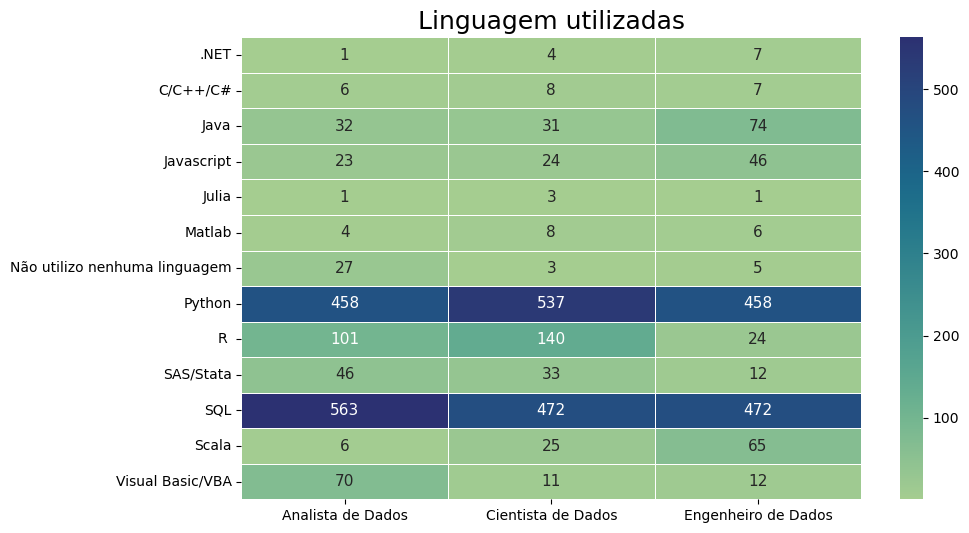

In [130]:
# Gerando um heatmap para visualização das linguagens mais utilizadas por cada profissional

linguagem_graph = sns.heatmap(df_heatmap_pivoted, linewidth=.5, vmin=1, vmax=563, annot=True, annot_kws={"fontsize":11}, fmt='g', cmap='crest')
linguagem_graph.set_xlabel('')
linguagem_graph.set_ylabel('')
linguagem_graph.figure.set_size_inches(10,6)
linguagem_graph.set_title('Linguagem utilizadas', fontsize=18)
plt.xticks(rotation=0)

Ao analisar o gráfico, percebemos que as linguagens mais utilizadas são: python, SQL, R, java e Visual Basic, respectivamente.
Os cientistas são os que mais utilizam Python, seguido por engenheiros e analistas com mesmo número. Quanto ao SQL, os analistas são os que mais utilizam, seguidos por cientistas e engenheiros (mesmo número novamente). O R aparece bem utilizado pelos cientistas com 140 profissionais e 101 analistas, todavia o número de engenheiros não é destaque. Por outro lado, Java aparece em quarto lugar sendo bem representado tão somente pelos engenheiros. Por fim, Visual Basic é utilizado de forma significativa apenas pelos analistas.